


---


**COMM055 COURSEWORK - A COMPARISON STUDY ON MACHINE LEARNING ALGORITHMS**




---





---


# **DATA PREPARATION AND DATA UNDERSTANDING**


---


This notebook focuses on **Data Preparation and Data Understanding** for the chosen datasets

**Datasets:** IBM Attrition, Mushroom Classification, Life Expectancy, Car Price Prediction

---


**Contents:**

1. IBM Attrition
2. Mushroom Classification
3. Life Expectancy
4. Car Price Prediction


---



# **1. IBM ATTRITION**


**DATA PREPARATION AND DATA UNDERSTANDING ON "IBM ATTRITION" DATASET**

---

1.1 Data Loading

1.2 Data Cleaning

1.3 Dimensionality Reduction

1.4 Data Exploration

1.5 Data Preparation

1.6 Data Visualization


---





## 1.1 Data Loading

In [0]:
# Importing Pandas Library - Each function from pandas is explained when those functions are used

import pandas as pd

# Click the run cell icon (play button icon) to run this code. Keyboard shortcut is Ctrl+Enter

In [0]:
# Before running this code, please upload the dataset. 
# To upload the dataset go to Files(the folder icon to the left)> Upload> choose IBM Attrition dataset from your local drive
# Reading the CSV file using pandas.read_csv function and storing in ibmData variable

ibmData = pd.read_csv("/content/IBM.csv")

## 1.2 Data Cleaning

In [3]:
#Step 1 - Checking for missing values using DataFrame.isnull() function

ibmData.isnull().values.any()

False

**Insight:** There are no missing values in "IBM Attrition" dataset

In [4]:
# Step 2 - Checking for Duplicate records
# This is done by using <DataFrame.duplicated()> function from pandas library

ibmData.duplicated().any()

False

**Insight:** There are no duplicate records in "IBM Attrition" dataset

Further aspects of Data Cleaning are done under Dimensionality Reduction and Data preperation sections

## 1.3 Dimensionality Reduction

In [5]:
# Step 1 - To check for columns having unique values (Primary Key like Serial No.)
# ----------------------------------------------------------------------------------------------------------------
# Having a look into the dataset helps in Dimensionality Reduction
# Using DataFrame.head() function to have a look into the inital few rows and all the columns in the dataframe

print(ibmData.head(4))

   Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes  ...                       0                     5
1   49        No  ...                       1                     7
2   37       Yes  ...                       0                     0
3   33        No  ...                       3                     0

[4 rows x 35 columns]


**Insight:** The column "Attrition" is our target variable with entries "Yes" and "No". The remaining columns are our input variables

In [6]:
# using DataFrame.info() function from pandas to know more about the dataset

ibmData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**Insight:** There are 35 columns/attributes with 1470 records/rows. The "EmployeeNumber" column of index 9 is most likely to be a primary key (having unique values)

In [7]:
# Section 1.3 Dimensionality Reduction - continued
# Step 1 - To check for columns having unique values (Primary Key like Serial No.)

for col in ibmData.columns:
    c = pd.value_counts(ibmData[col])
    ibmUnique = pd.Series({"Column Name:": col, "Number of Unique entries:" : len(c)})
    print(ibmUnique)
    print()

Column Name:                 Age
Number of Unique entries:     43
dtype: object

Column Name:                 Attrition
Number of Unique entries:            2
dtype: object

Column Name:                 BusinessTravel
Number of Unique entries:                 3
dtype: object

Column Name:                 DailyRate
Number of Unique entries:          886
dtype: object

Column Name:                 Department
Number of Unique entries:             3
dtype: object

Column Name:                 DistanceFromHome
Number of Unique entries:                  29
dtype: object

Column Name:                 Education
Number of Unique entries:            5
dtype: object

Column Name:                 EducationField
Number of Unique entries:                 6
dtype: object

Column Name:                 EmployeeCount
Number of Unique entries:                1
dtype: object

Column Name:                 EmployeeNumber
Number of Unique entries:              1470
dtype: object

Column Name:                

**Insight 1:** The column EmployeeNumber has 1470 unique entries and this column can be dropped because it not going to contribute to any learning for the model

**Insight 2:** There are other columns that have more than 1000 unique values out of the 1470 records. These columns/attributes could play major role in Machine learning and the number of unique values could be reduced by "Binning"


In [8]:
# Section 1.3 Dimensionality Reduction - Continued
# Step 2 - To check for any column having only one value in more than 97% of the records (also called as "Low Variance Filter")
# Reference: https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d


#No. of rows using len()
num_rows = len(ibmData.index)
rep_info_cols = []

#Iterating for each column in the dataset
for col in ibmData.columns:
    counts = ibmData[col].value_counts(dropna=False)
    top_percent = (counts/num_rows).iloc[0]

#Checking for the condition if any column has only on value in more than 97% of the records    
    if top_percent > 0.97:
        rep_info_cols.append(col)
        print('{0}:{1:.2f}%'.format(col, top_percent*100))
        print(counts)
        print()


EmployeeCount:100.00%
1    1470
Name: EmployeeCount, dtype: int64

Over18:100.00%
Y    1470
Name: Over18, dtype: int64

StandardHours:100.00%
80    1470
Name: StandardHours, dtype: int64



**Insight:** The columns EmployeeCount, Over18, StandardHours have only one value in all the 1470 records which can be removed for data modelling as it is not going to contribute to the learning for modelling

In [0]:
# As per Step 1 and 2, four columns named "EmployeeNumber", "EmployeeCount", "Over18", "StandardHours" are dropped from the data frame

ibmData = ibmData.drop(['EmployeeCount','Over18', 'StandardHours', 'EmployeeNumber'], axis=1)


In [0]:
# Step 3 - High Correlation Filter
# Reference: https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

# To perform correlation calculation, first we drop the target variable and create a dataframe (ibmDataInput) with only input variables

ibmDataInput = ibmData.drop('Attrition', axis = 1)


In [11]:
# Visualizing the correlation between attributes using heatmap
# Importing seaborn library for heatmaps
# Importing pyplot from matplotlib for plotting heatmaps
# Importing numpy for getting absolute value in correlation matrix

import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


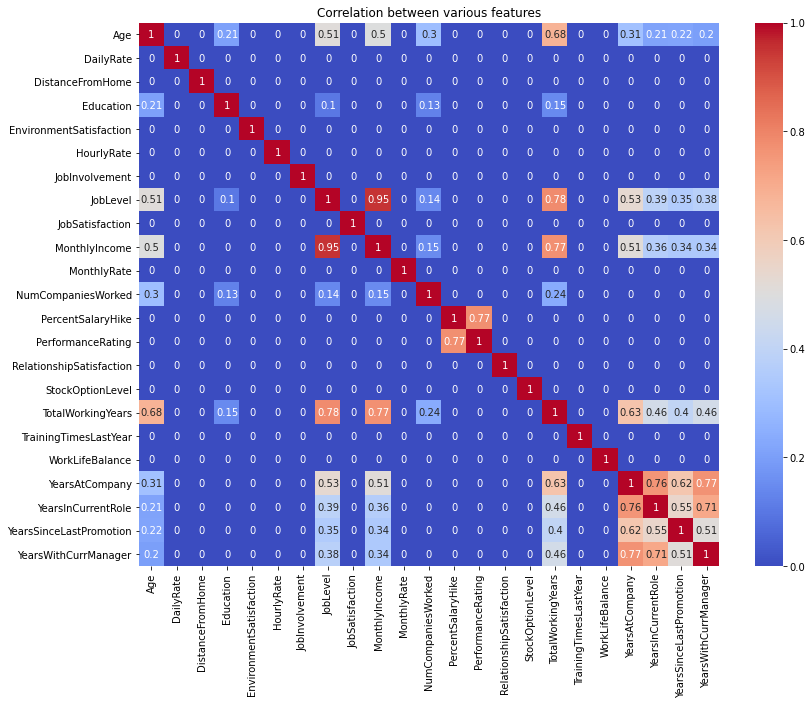

In [12]:
# The idea is to drop the columns that have high correlation.
# The below set of codes explain the following:
# Line 1 -> Correlation matrix is got using the DataFrame.corr() function and storing it in a variable(ibmDataInput_corr)
# Line 2 -> As we are only looking for high correlation, the factors that have correlation less than 0.1 is equalled to 0
# Line 3 -> Gives the size of the graph(width, height)
# Line 4 -> using sns.heatmap(data) function to visualize the heatmap
# Line 5,6 -> Giving a title to the heatmap and showing the graph

ibmDataInput_corr = ibmDataInput.corr()
ibmDataInput_corr[np.abs(ibmDataInput_corr < 0.1)] = 0
plt.figure(figsize=(13,10))
sns.heatmap(ibmDataInput_corr, annot = True, cmap = 'coolwarm')
plt.title("Correlation between various features")
plt.show()


**Insight:** The highly correlated attributes are "MonthlyIncome" and "JobLevel" with 95% of correlation. 

Also, there are other columns that shows promising correlation around 70 - 78%


In [13]:
# To visualize only the highly correlated attributes using heatmaps
# To find the top correlated features we are sorting the correlation values with high to low

corr_matrix = ibmDataInput.corr().abs() 
corrsort = ibmDataInput.corr().unstack().sort_values(ascending = False).drop_duplicates() 
corrsort_df = pd.DataFrame(data=corrsort)
corrsort_df.head(10)


0
YearsWithCurrManager YearsWithCurrManager  1.000000
JobLevel             MonthlyIncome         0.950300
TotalWorkingYears    JobLevel              0.782208
PerformanceRating    PercentSalaryHike     0.773550
TotalWorkingYears    MonthlyIncome         0.772893
YearsAtCompany       YearsWithCurrManager  0.769212
                     YearsInCurrentRole    0.758754
YearsWithCurrManager YearsInCurrentRole    0.714365
TotalWorkingYears    Age                   0.680381
YearsAtCompany       TotalWorkingYears     0.628133

In [14]:
# Creating a dataframe with only the above specified columns and storing it in ibmDataHighCorr

ibmDataHighCorr = ibmDataInput[['MonthlyIncome', 'JobLevel', 'TotalWorkingYears', 'YearsWithCurrManager', 'YearsAtCompany', 'YearsInCurrentRole', 'PerformanceRating', 'PercentSalaryHike', 'Age']]
ibmDataHighCorr.head()


MonthlyIncome  JobLevel  ...  PercentSalaryHike  Age
0           5993         2  ...                 11   41
1           5130         2  ...                 23   49
2           2090         1  ...                 15   37
3           2909         1  ...                 11   33
4           3468         1  ...                 12   27

[5 rows x 9 columns]

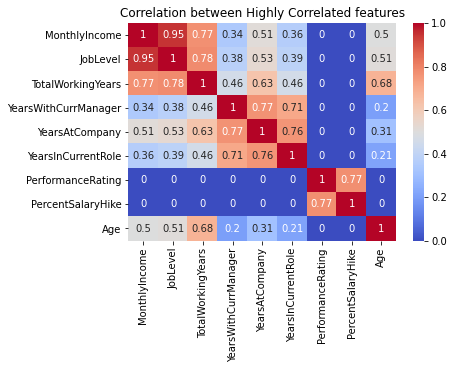

In [15]:
# Visualizing the correlation using heatmaps from seaborn library

highcorr = ibmDataHighCorr.corr()
highcorr[np.abs(highcorr < 0.1)] = 0
#plt.figure(figsize=(8,8))
sns.heatmap(highcorr, annot = True, cmap = 'coolwarm')
plt.title("Correlation between Highly Correlated features")
plt.show()

**Insight:** The highly correlated attributes are "MonthlyIncome" and "JobLevel" with 95% of correlation as already seen.

The other promising factors that show significant correlation are:

1. "TotalWorkingYears" and "JobLevel" with 78%

2. "TotalWorkingYears" and "MonthlyIncome" with 77%

3. "YearsWithCurrManager" and "YearsAtCompany" with 77%

4. "PerformanceRating" and "PercentSalaryHike" with 77%

5. "YearsInCurrentRole" and "YearsAtCompany" with 76%

6. "YearsWithCurrManager" and "YearsInCurrentRole" with 71%

**Action and Justification:** Among the highly correlated factors ('MonthlyIncome' and 'JobLevel' we decided to remove the factor that has many input values compared to the other factor. Therefore, "MonthyIncome" is removed from the dataframe.

**Considering:** If to remove other correlated factors depends on how well the model learns and generalizes with or without the columns/attributed as per the CRISP-DM3 Methodology.



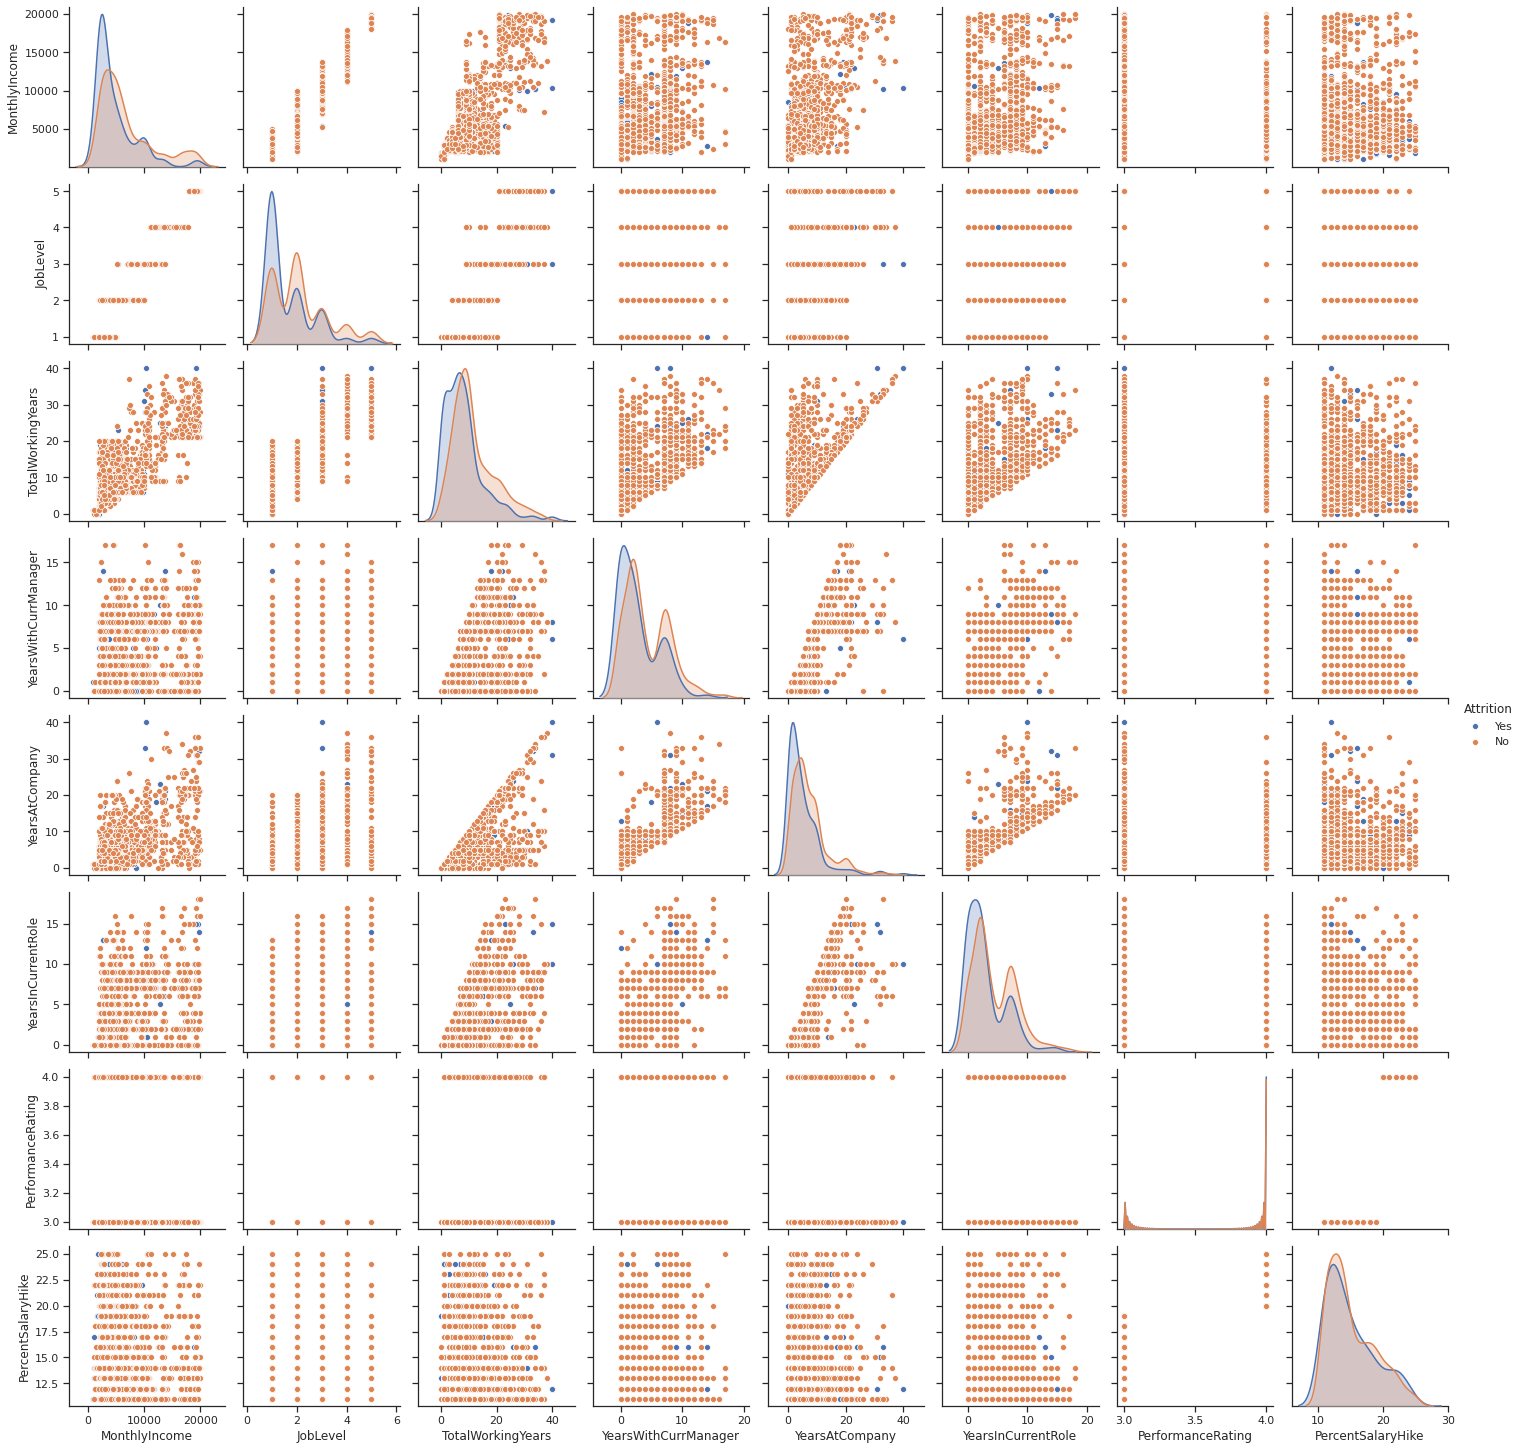

In [16]:
# Scatter matrix for visualization among highly correlated features
import seaborn as sns
sns.set(style="ticks")
ibmDataHighCorr = ibmData[['Attrition', 'MonthlyIncome', 'JobLevel', 'TotalWorkingYears', 'YearsWithCurrManager', 'YearsAtCompany', 'YearsInCurrentRole', 'PerformanceRating', 'PercentSalaryHike']]
sns.pairplot(ibmDataHighCorr, hue="Attrition") 


In [0]:
# Section 1.3 Dimensionality Reduction - Continued
# As per Step 3, "MonthlyIncome" is dropped from the data frame

ibmData = ibmData.drop(['MonthlyIncome'], axis=1)

## 1.4 Data Exploration

In [18]:
# To explore the attributes having numeric and categorical values seperately, we are creating one dataframe for numeric and another for categorical
# The libraries used are numpy, seaborn, matplotlib which have been imported already for Dimensionality Reduction process.  
# ---------------------------------------------------------------------------------------------------------------------------------------------------------
# Attributes with only numeric values are stored in ibm_numeric array

ibm_numeric = ibmData.select_dtypes(include = [np.number])
ibm_numeric = ibm_numeric.columns.values
ibm_numeric

array(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype=object)

In [19]:
# Attributes with only categorical values are stored in ibm_categoric array

ibm_categoric = ibmData.select_dtypes(exclude = [np.number])
ibm_categoric = ibm_categoric.columns.values
ibm_categoric


array(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], dtype=object)

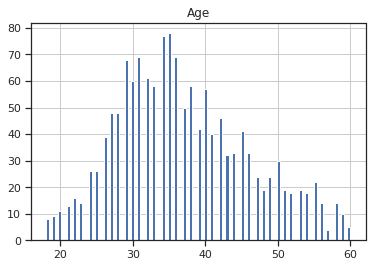

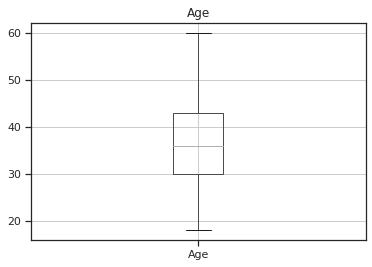

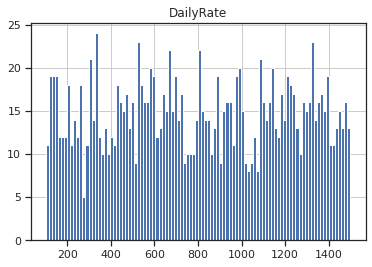

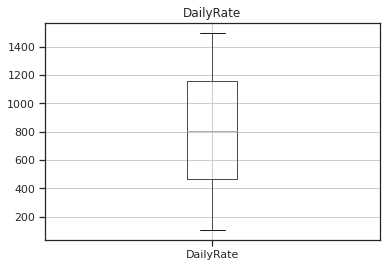

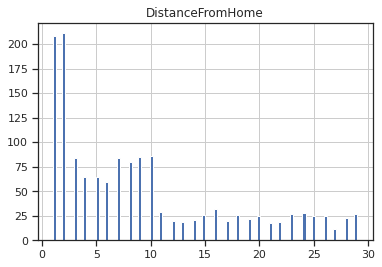

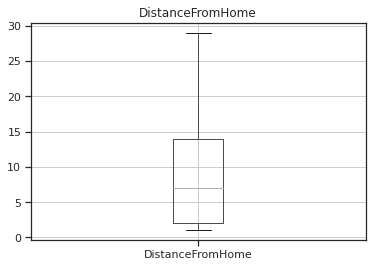

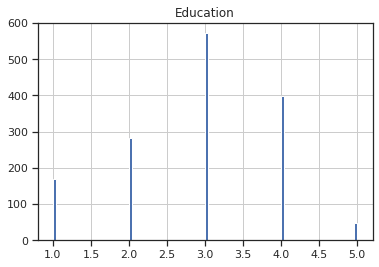

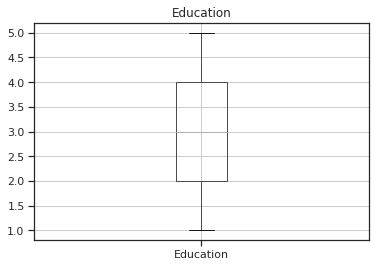

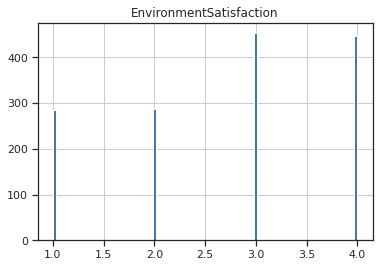

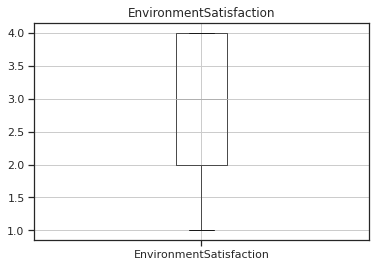

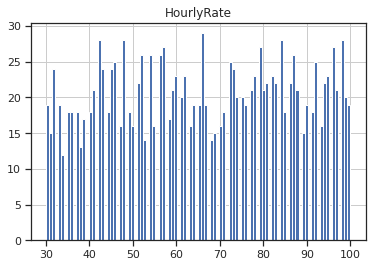

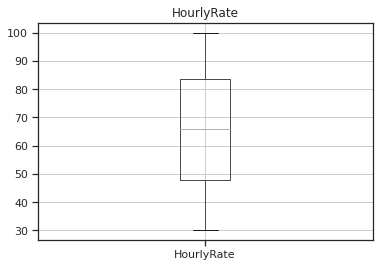

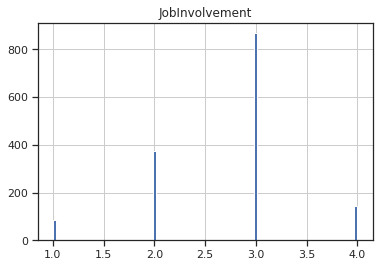

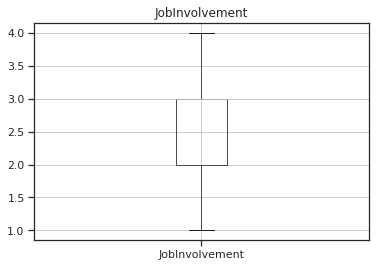

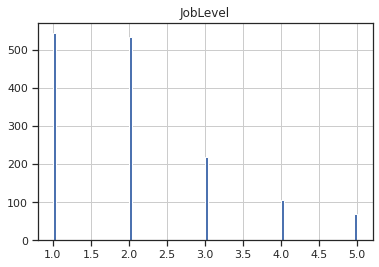

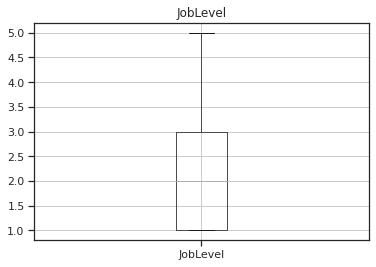

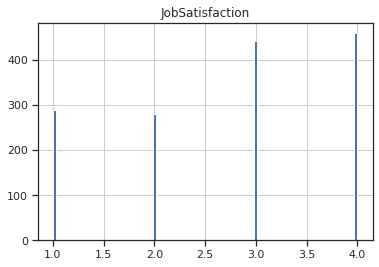

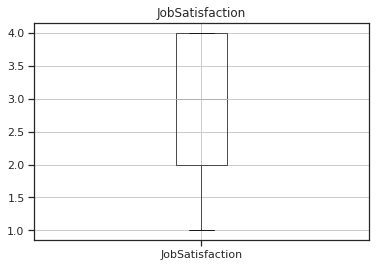

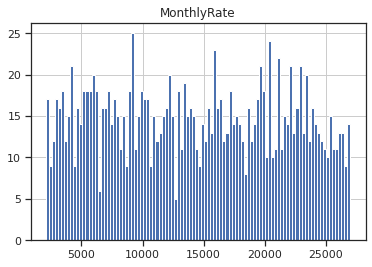

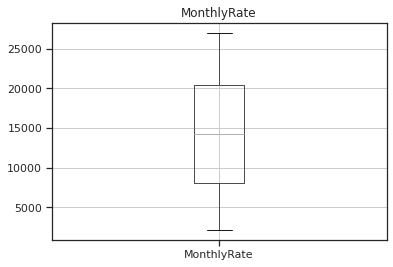

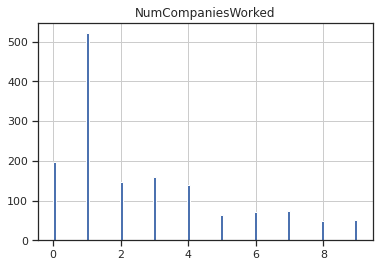

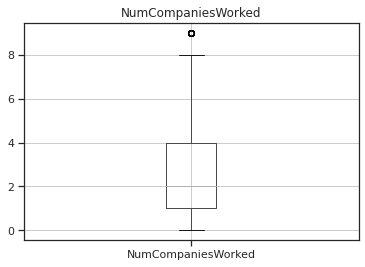

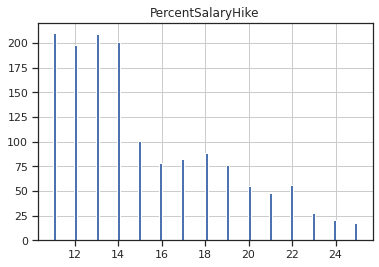

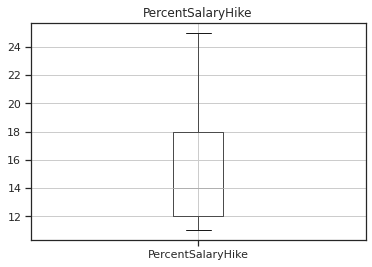

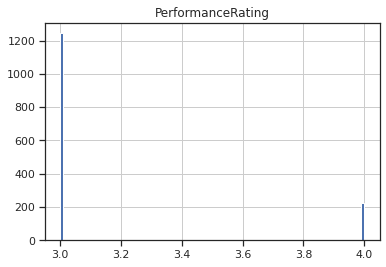

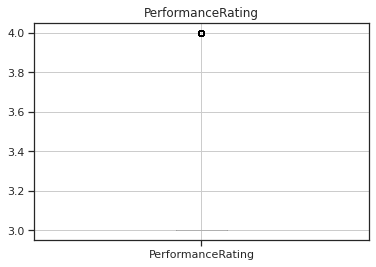

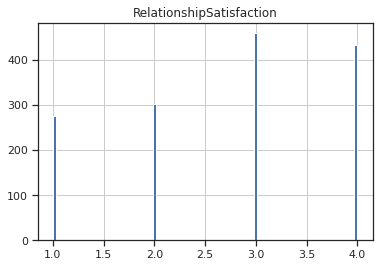

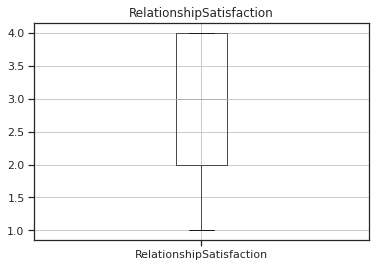

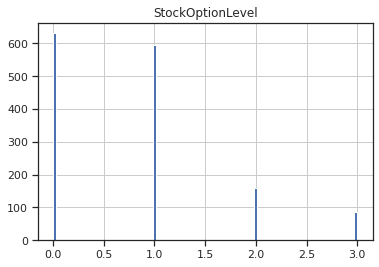

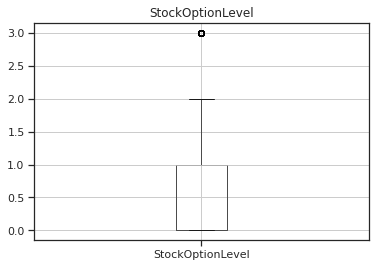

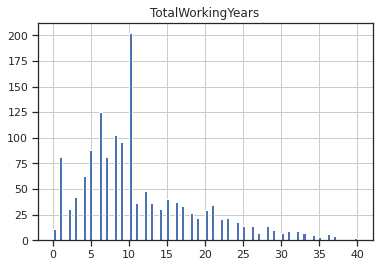

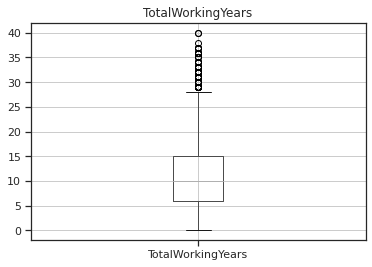

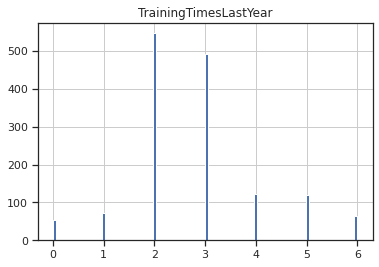

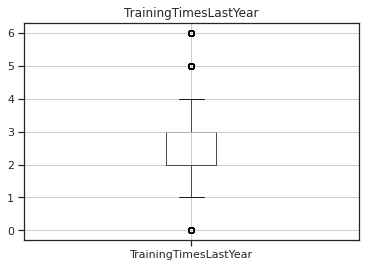

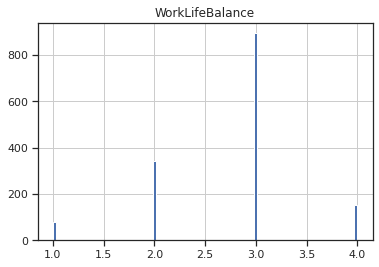

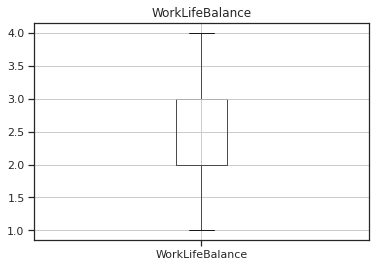

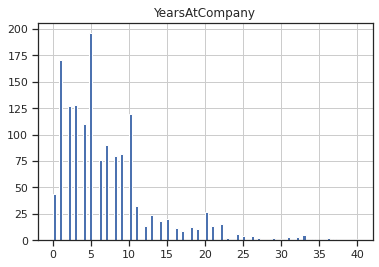

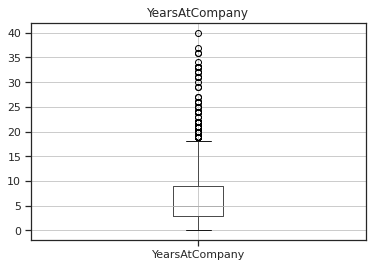

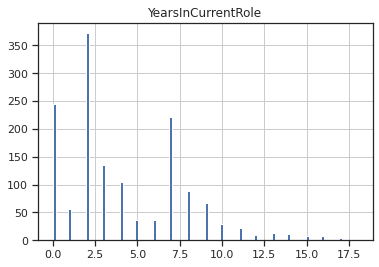

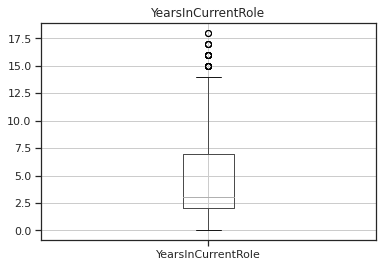

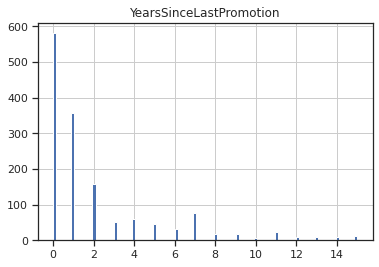

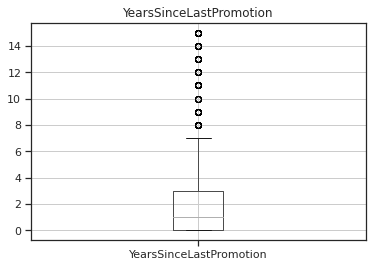

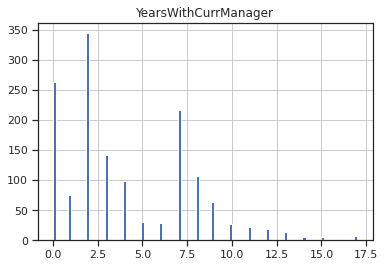

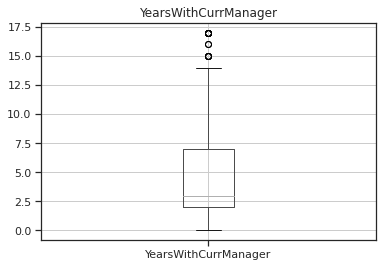

In [20]:
# Plotting Histogram and box plot graphs for Numeric Attributes

for i in ibm_numeric:
    ibmData[i].hist(bins=100)
    plt.title(i)
    plt.show()
    print()
    ibmData.boxplot(column = [i])
    plt.title(i)
    plt.show()
    print()

**Insight:** We could see few  attributes having data points lying outside the box plot. Outliers? 


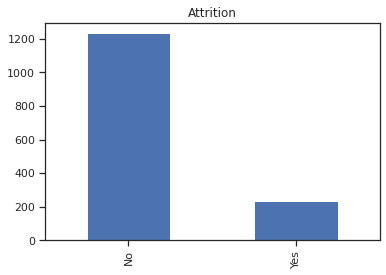

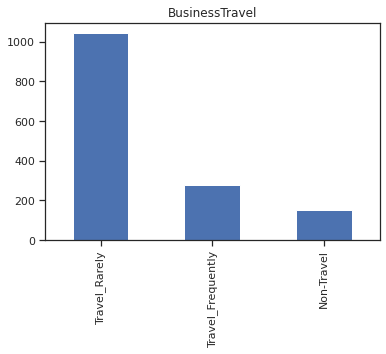

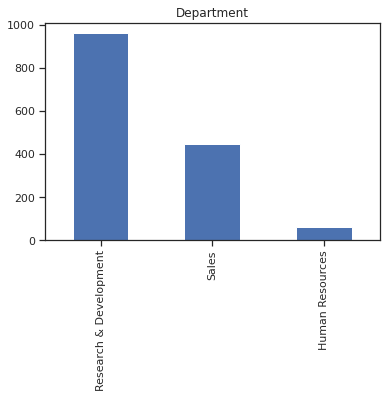

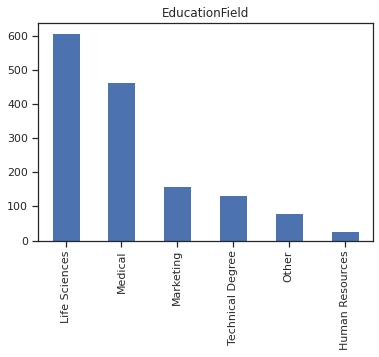

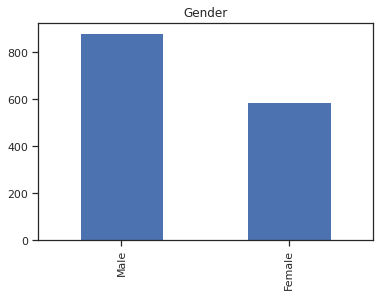

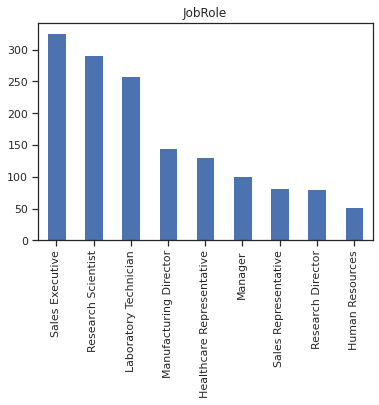

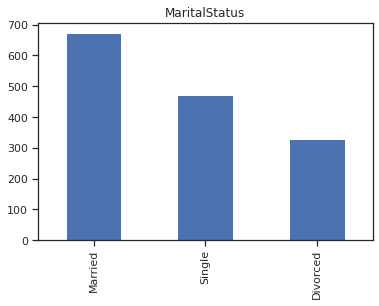

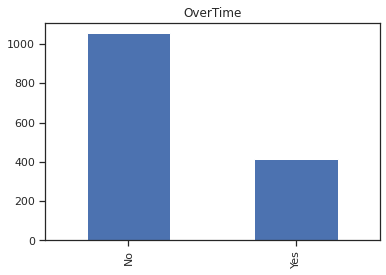

In [21]:
# Plotting Bar Charts for exploring Categorical Attributes


for i in ibm_categoric:
    ibmData[i].value_counts().plot.bar()
    plt.title(i)
    plt.show()
    print()

**Insight:** From the bar plot of the target variable its clear that the classes are unbalanced with many "no" values and few "yes" values

## 1.5 Data Preparation

In [22]:
# Section 1.5 Data Preparation
# To check for the data types and converting wrong data types to the right ones

ibmData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

**Insight:** The below columns have dataype as "Object" which can be changed to "Category" which helps in reducing the size of the dataframe thereby making computations faster.

From "Object" to "Category": Attrition, BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, OverTime



In [23]:
for i in ibm_categoric:
  ibmData[i] = ibmData[i].astype('category')

ibmData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EnvironmentSatisfaction   1470 non-null   int64   
 9   Gender                    1470 non-null   category
 10  HourlyRate                1470 non-null   int64   
 11  JobInvolvement            1470 non-null   int64   
 12  JobLevel                  1470 non-null   int64   
 13  JobRole                   1470 non-null   catego

In [0]:
# Export out the final Dataframe

ibmData.to_csv("ibmData.csv", index=False)

**Conclusion:** The Data Preparation and Data Understanding for "IBM Attrition" dataset is done and "ibmData.csv" can be used for further preprocessing and building ML models.

## 1.6 Data Visualization

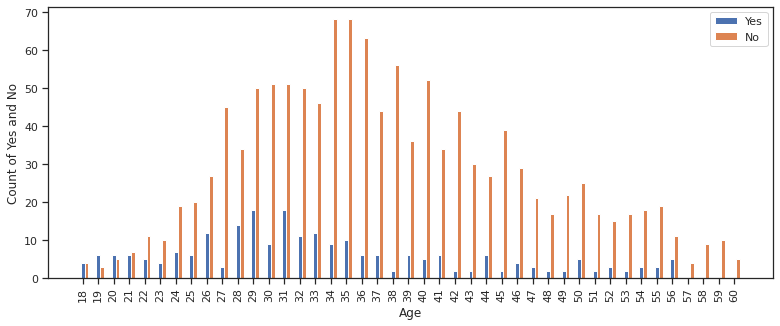

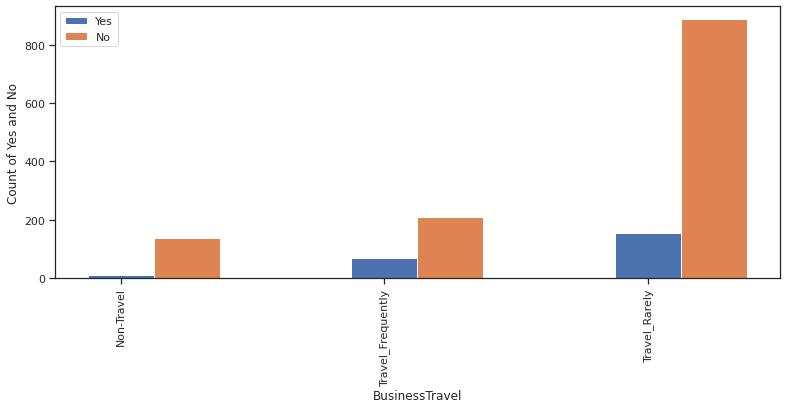

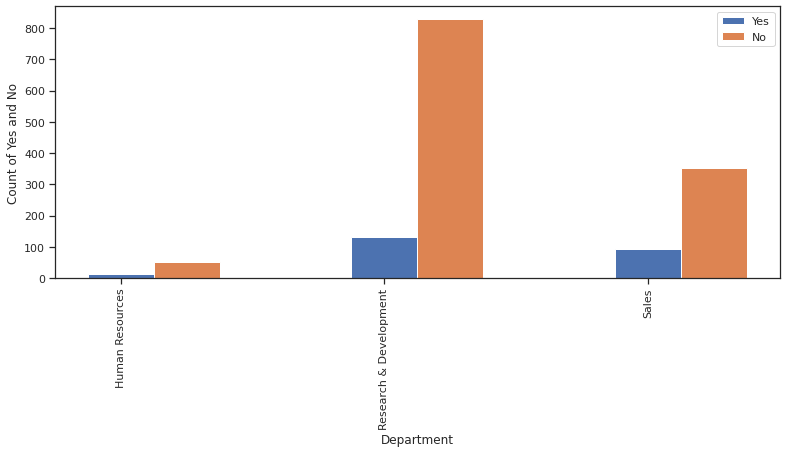

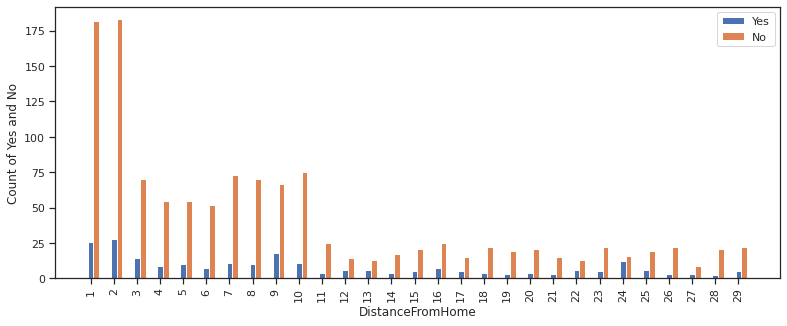

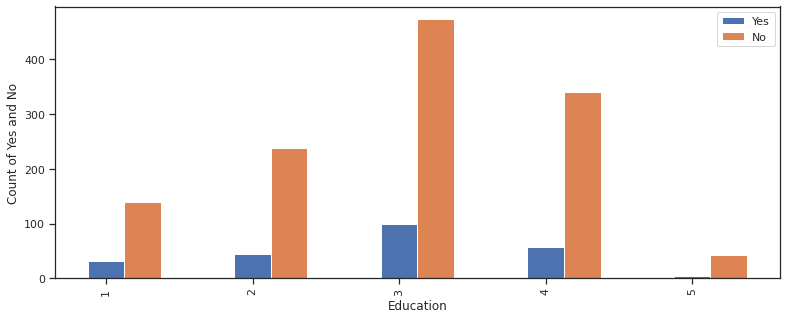

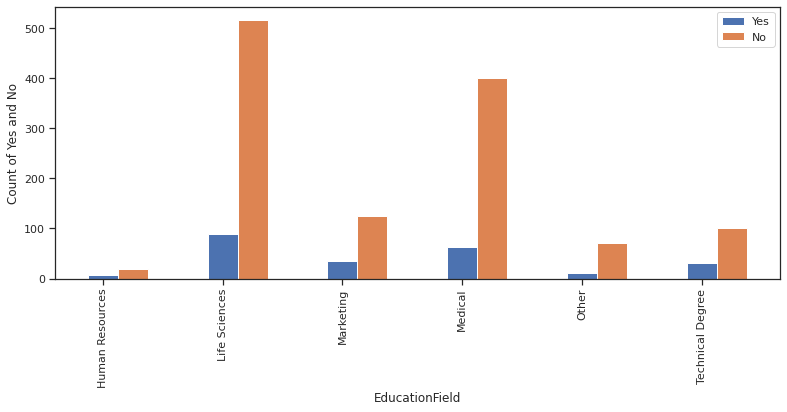

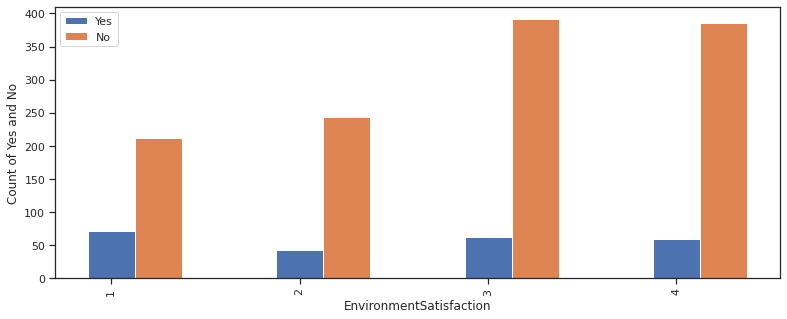

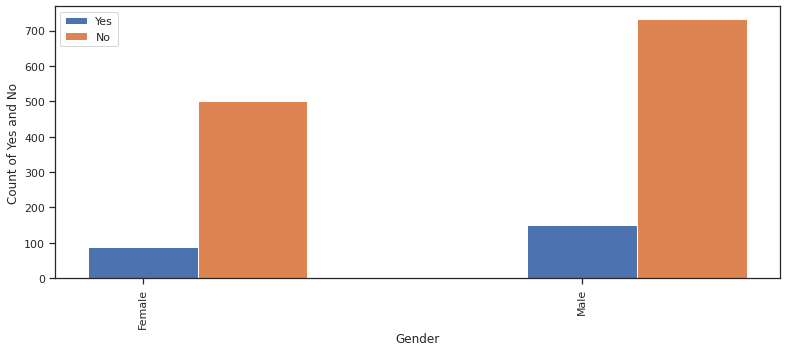

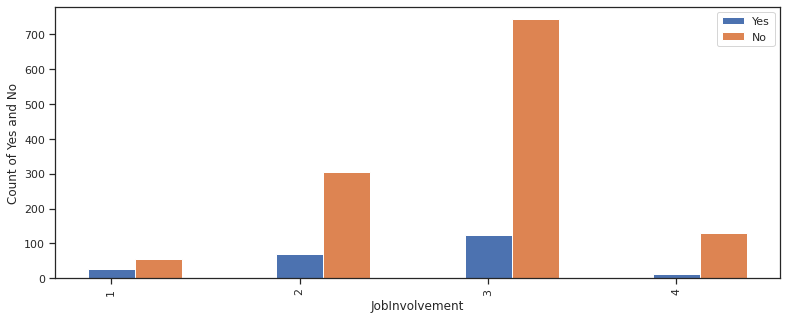

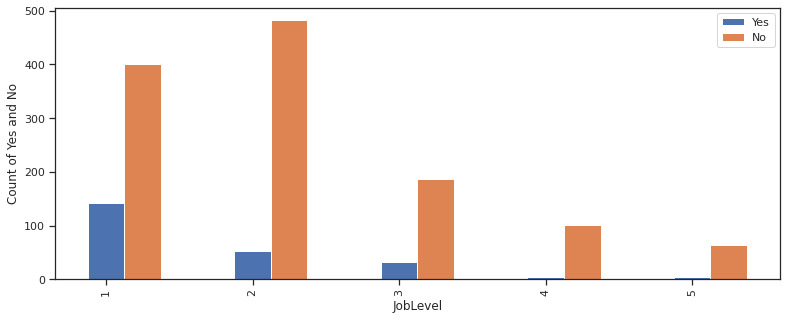

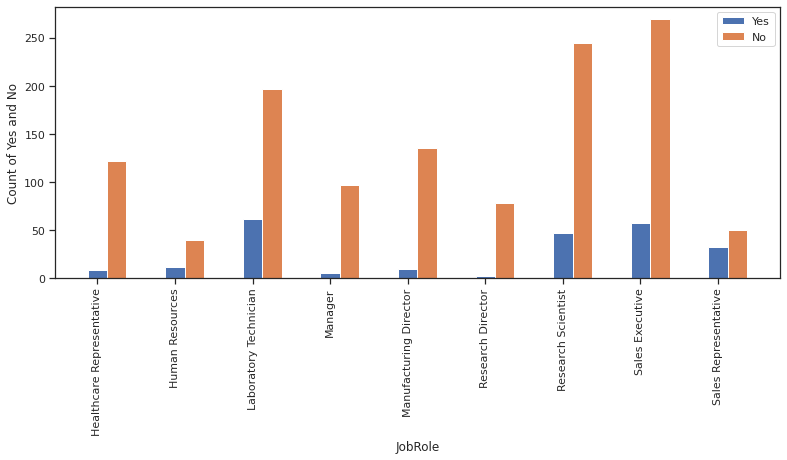

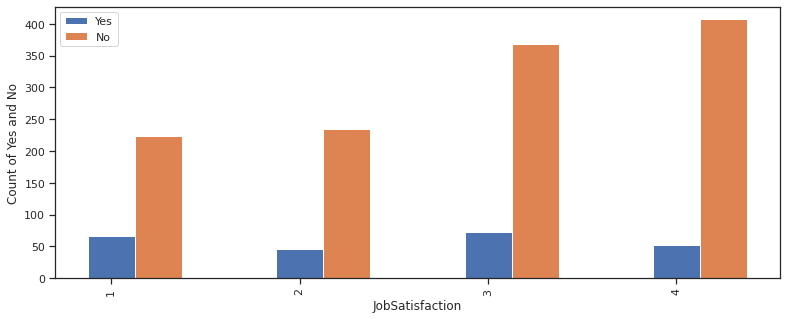

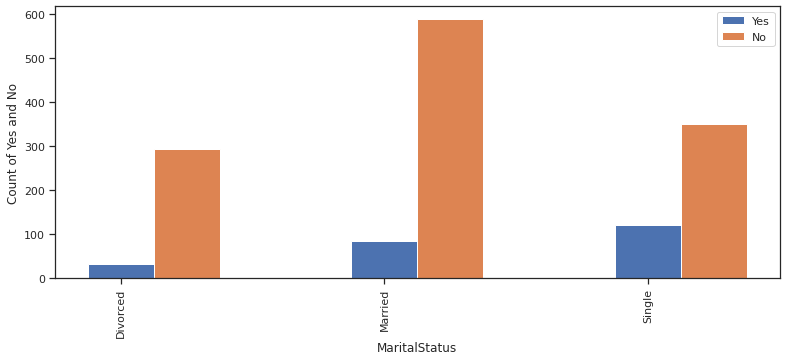

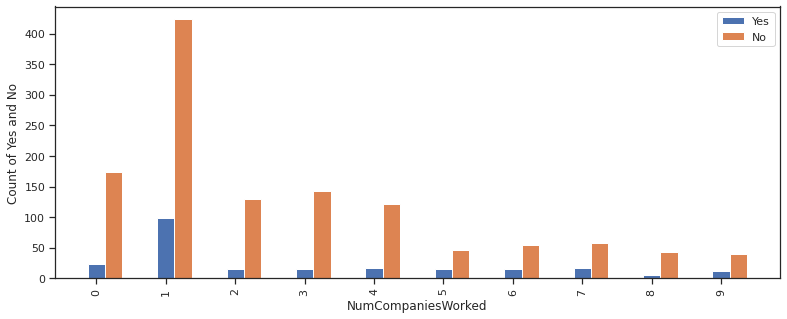

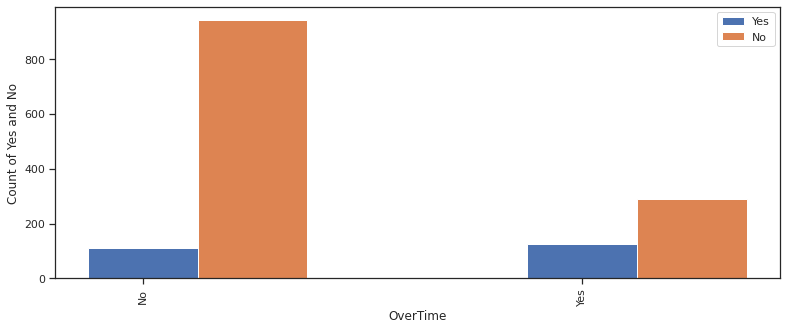

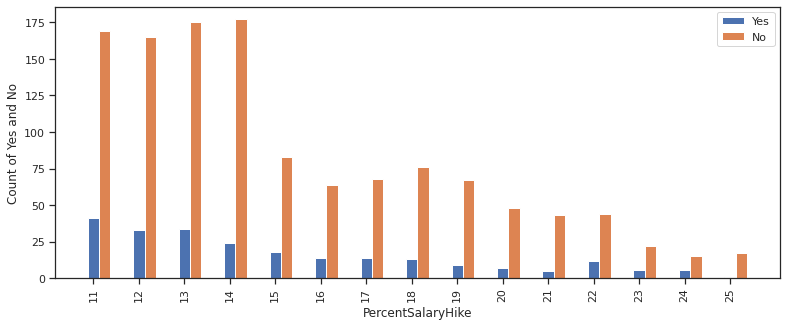

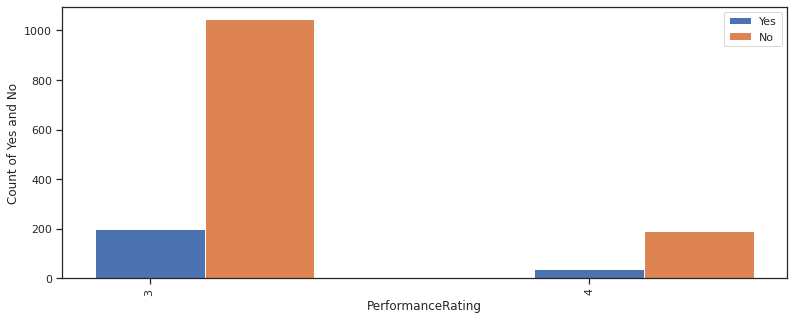

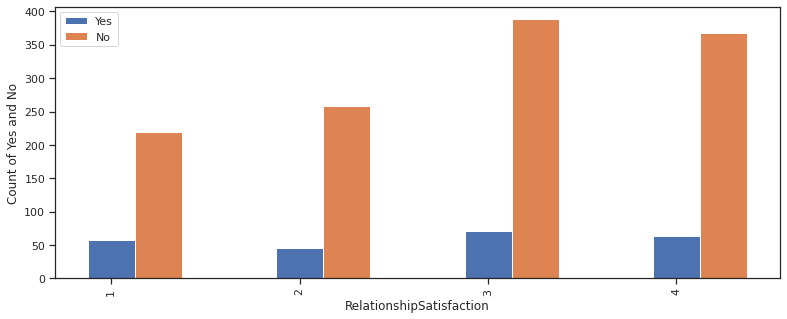

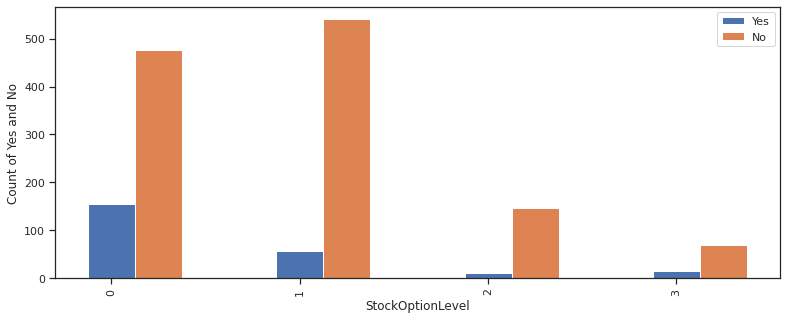

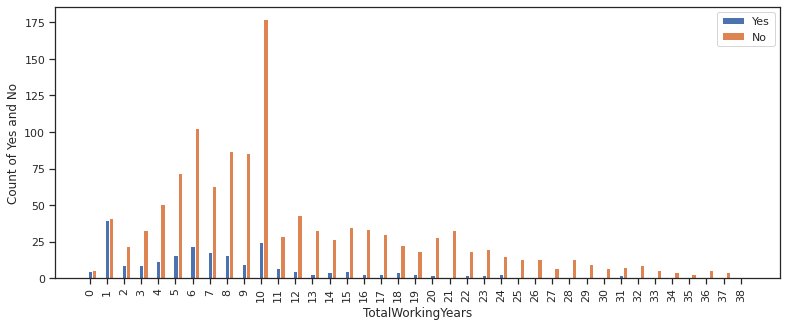

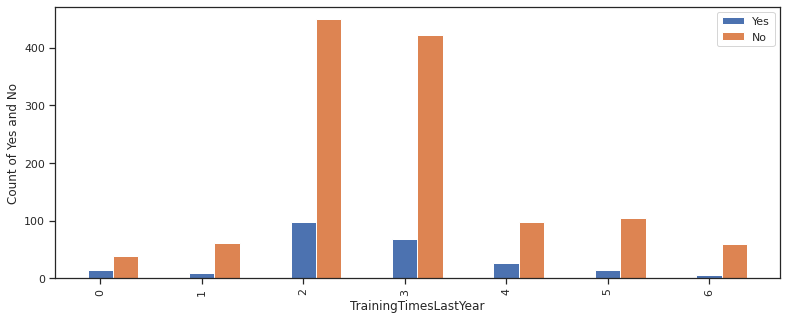

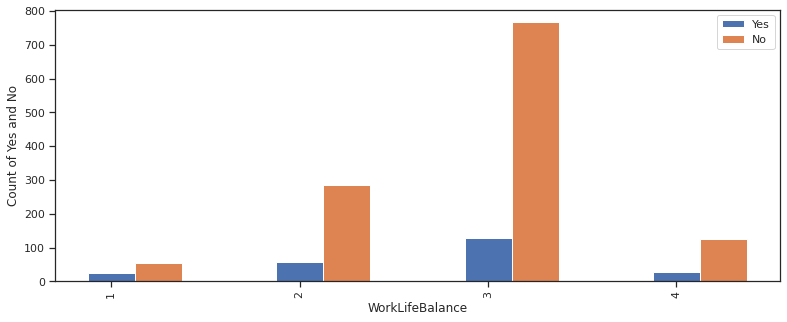

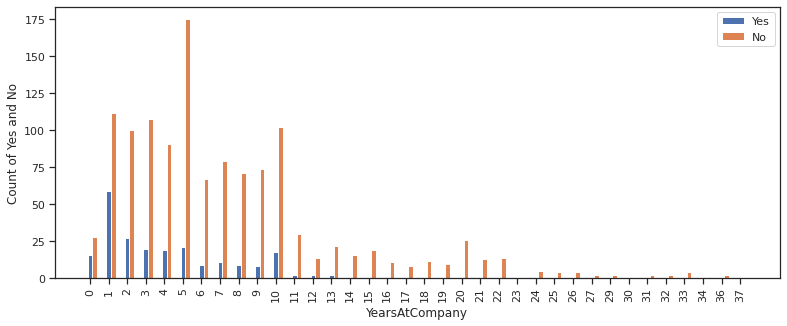

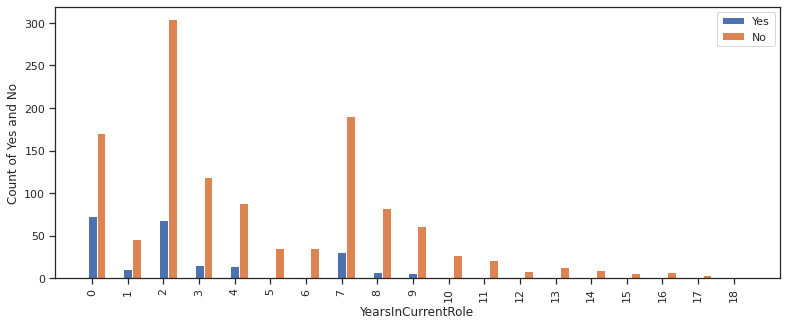

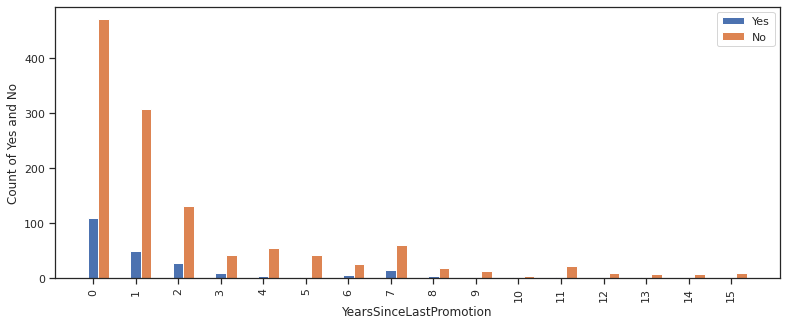

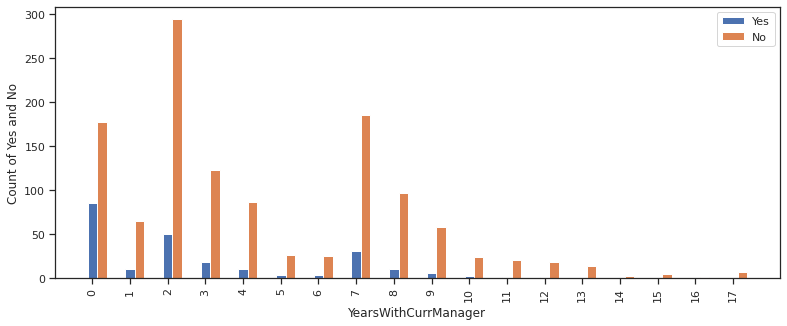

In [0]:
# To visualize the number of employees with Attirtion value "Yes" and "No", we make use of the bar plot

# Creating a dataframe with employees who have Attrition as "Yes"
yes = ibmData[ibmData['Attrition'] == 'Yes']

# Creating a dataframe with employees who have Attrition as "No"
no = ibmData[ibmData['Attrition'] == 'No']

# A dataframe X that drops the target variable "Attrition" and also other variables that have many unique entries which can't be handled using Bar charts
X = ibmData.drop(['Attrition', 'MonthlyRate', 'DailyRate', 'HourlyRate'], axis=1)

# Plotting each of the input variable againt the number of people who have Attrition as "Yes" adn "No"
# For example, to check hoe many people with spefici age group have left or not left the company

# Iterating all the columns of the X dataframe
for i in X.columns:
  plot_yes = yes.groupby(i)['Attrition'].count()  #data that has the count of employees belonging to the specific input variable who have yes values in "Attrition"
  plot_no = no.groupby(i)['Attrition'].count()  #data the count of employees belonging to the specific input variable who have no values in "Attrition"
  x = np.arange(len(plot_yes)) 
  width = 0.25  
  plt.figure(figsize=(13,5))
  plt.bar(x, plot_yes, width = width, label = "Yes") #plotting the count of employees belonging to the specific input variable who have yes values in "Attrition"
  x2 = np.arange(len(plot_no))
  plt.bar(x2 + width, plot_no, width = width, label = "No") #plotting the count of employees belonging to the specific input variable who have no values in "Attrition"
  plt.legend()
  plt.xlabel(str(i))
  plt.ylabel('Count of Yes and No')
  #plt.xticks(ticks=x, labels=plot_yes.index, rotation = 90)
  plt.xticks(ticks=x2, labels=plot_no.index, rotation = 90)
  plt.show()




# **2. MUSHROOM CLASSIFICATION**

**DATA PREPARATION AND DATA UNDERSTANDING ON "MUSHROOM CLASSIFICATION" DATASET**

---

2.1 Data Loading

2.2 Data Cleaning

2.3 Dimensionality Reduction

2.4 Data Exploration

2.5 Data Preparation

2.6 Data Visualization


---


## 2.1 Data Loading

In [0]:
# Importing Pandas Library - Each function from pandas is explained when those functions are used

import pandas as pd

# Click the run cell icon (play button icon) to run this code. Keyboard shortcut is Ctrl+Enter

In [0]:
# Before running this code, please upload the dataset. 
# To upload the dataset go to Files(the folder icon to the left)> Upload> choose "Mushroom Classification" dataset from your local drive
# Reading the CSV file using pandas.read_csv function and storing in mushroomData variable

mushroomData = pd.read_csv("/content/mushrooms.csv")

## 2.2 Data Cleaning

In [0]:
# Step 1 - Checking for missing values using DataFrame.isnull() function

mushroomData.isnull().values.any()

False

**Insight:** There are no missing values in "Mushroom Classification" dataset.

In [0]:
# Step 2 - Checking for Duplicate records
# This is done by using <DataFrame.duplicated()> function from pandas library

mushroomData.duplicated().any()

False

**Insight:** There are no duplicate records in the dataset

Further aspects of Data Cleaning are done under Dimensionality Reduction and Data preperation sections

## 2.3 Dimensionality Reduction

In [0]:
# Step 1 - To check for columns having unique values (Primary Key like Serial No.)
# ----------------------------------------------------------------------------------------------------------------
# Having a look into the dataset helps in Dimensionality Reduction
# Using DataFrame.head() function to have a look into the inital few rows and all the columns in the dataframe

print(mushroomData.head(4))

  class cap-shape cap-surface  ... spore-print-color population habitat
0     p         x           s  ...                 k          s       u
1     e         x           s  ...                 n          n       g
2     e         b           s  ...                 n          n       m
3     p         x           y  ...                 k          s       u

[4 rows x 23 columns]


**Insight:** The target/dependent variable is the column named "class" and other 22 columns are the input variables.

In [0]:
# Using DataFrame.info() function from pandas to know more about the dataset

mushroomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [0]:
# Step 1 - To check for columns having unique values (Primary Key like Serial No.)

for col in mushroomData.columns:
    c = pd.value_counts(mushroomData[col])
    mrUnique = pd.Series({"Column Name:": col, "Number of Unique entries:" : len(c)})
    print(mrUnique)
    print()

Column Name:                 class
Number of Unique entries:        2
dtype: object

Column Name:                 cap-shape
Number of Unique entries:            6
dtype: object

Column Name:                 cap-surface
Number of Unique entries:              4
dtype: object

Column Name:                 cap-color
Number of Unique entries:           10
dtype: object

Column Name:                 bruises
Number of Unique entries:          2
dtype: object

Column Name:                 odor
Number of Unique entries:       9
dtype: object

Column Name:                 gill-attachment
Number of Unique entries:                  2
dtype: object

Column Name:                 gill-spacing
Number of Unique entries:               2
dtype: object

Column Name:                 gill-size
Number of Unique entries:            2
dtype: object

Column Name:                 gill-color
Number of Unique entries:            12
dtype: object

Column Name:                 stalk-shape
Number of Unique entries:  

**Insight:** There are no columns with unique entries

In [0]:
# Step 2 - To check for any column having only one value in more than 97% of the records (also called as "Low Variance Filter")
# Reference: https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d
# <To include: The explaination for the below codes>

num_rows = len(mushroomData.index)
rep_info_cols = []

for col in mushroomData.columns:
    counts = mushroomData[col].value_counts(dropna=False)
    top_percent = (counts/num_rows).iloc[0]
    
    if top_percent > 0.97:
        rep_info_cols.append(col)
        print('{0}:{1:.2f}%'.format(col, top_percent*100))
        print(counts)
        print()


gill-attachment:97.42%
f    7914
a     210
Name: gill-attachment, dtype: int64

veil-type:100.00%
p    8124
Name: veil-type, dtype: int64

veil-color:97.54%
w    7924
o      96
n      96
y       8
Name: veil-color, dtype: int64



**Insight:** The output shows that "veil-type" has only one value through all the 8124 records. Hence, this column can be dropped as this is not going to contribute to the learning for the model.

**Considering:** The other columns "gill-attachement" and "veil-color" has only one value in more than 97% of the records. If to remove these columns depends on how well the model learns and generalizes with or without the columns/attirbutes as per the CRISP-DM3 Methodology.

In [0]:
# # As per Step 2, the column named "veil-type"is dropped from the data frame

mushroomData = mushroomData.drop(['veil-type'], axis=1)


In [0]:
# Section 2.3 Dimensionality Reduction - continued
# Step 3 - High Correlation Filter
# Reference: https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

# To perform correlation calculation, first we drop the target variable ('class') and create a dataframe (mrDataInput) with only input variables

mrDataInput = mushroomData.drop('class', axis = 1)


In [0]:
# Visualizing the correlation between attributes using heatmap
# Importing seaborn library for heatmaps
# Importing pyplot from matplotlib for plotting heatmaps
# Importing numpy for getting absolute value in correlation matrix

import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np


In [0]:
# Correlation matrix can be got only for numeric columns. 
# Since all the columns in the dataset is categorical we are conveting them to numeric (like labelling) using factorize() function from the pandas library.

for i in mrDataInput.columns:
    mrDataInput[i] = pd.factorize(mrDataInput[i])[0]


In [0]:
# To check if the actual and converted values (numerically labelled) have remained same

for i in mrDataInput.columns:
  actual = mushroomData[i].value_counts()
  print(actual)
  encoded = mrDataInput[i].value_counts()
  print(encoded)



x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
0    3656
3    3152
4     828
1     452
2      32
5       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
1    3244
0    2556
2    2320
3       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
0    2284
3    1840
4    1500
1    1072
2    1040
6     168
5     144
8      44
7      16
9      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
1    4748
0    3376
Name: bruises, dtype: int64
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
3    3528
4    2160
7     576
6     576
2     400
1     400
0     256
5     192
8      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
0    7914
1     210
Name: gill-att

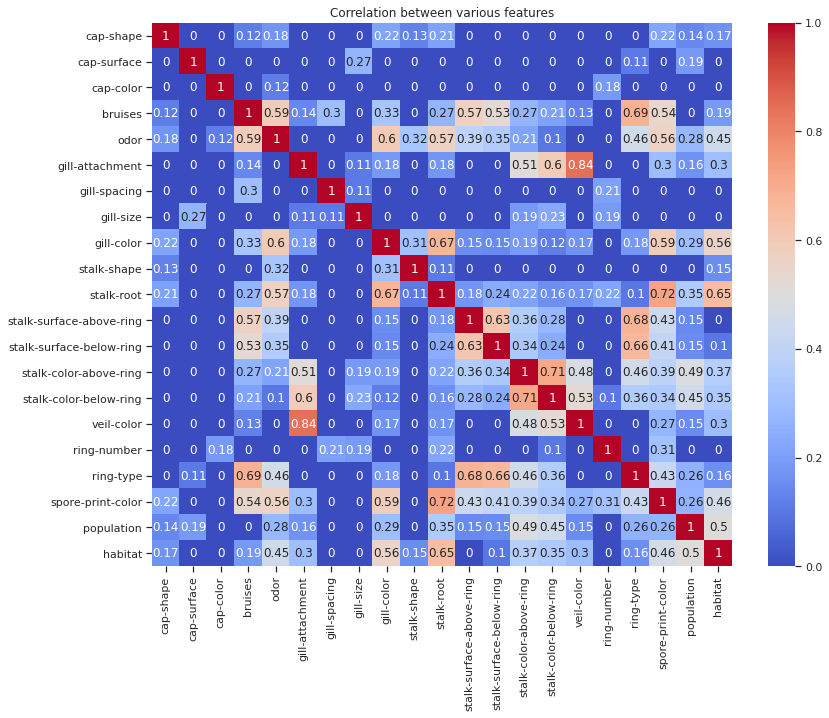

In [0]:
# The idea is to drop the columns that have high correlation.
# The below set of codes explain the following:
# Line 1 -> Correlation matrix is got using the DataFrame.corr() function and storing it in a variable(mrDataInput_corr)
# Line 2 -> As we are only looking for high correlation, the factors that have correlation less than 0.1 is equalled to 0
# Line 3 -> Gives the size of the graph(width, height)
# Line 4 -> using sns.heatmap(data) function to visualize the heatmap
# Line 5,6 -> Giving a title to the heatmap and showing the graph

mrDataInput_corr = mrDataInput.corr()
mrDataInput_corr[np.abs(mrDataInput_corr < 0.1)] = 0
plt.figure(figsize=(13,10))
sns.heatmap(mrDataInput_corr, annot = True, cmap = 'coolwarm')
plt.title("Correlation between various features")
plt.show()


In [0]:
# To visualize only the highly correlated attributes using heatmaps
# To find the top correlated features we are sorting the correlation values with high to low

corr_matrix = mrDataInput.corr().abs() 
corrsort = mrDataInput.corr().unstack().sort_values(ascending = False).drop_duplicates() 
corrsort_df = pd.DataFrame(data=corrsort)
corrsort_df.head(10)


0
habitat                  habitat                   1.000000
gill-attachment          veil-color                0.842230
spore-print-color        stalk-root                0.724314
stalk-color-above-ring   stalk-color-below-ring    0.711672
bruises                  ring-type                 0.685119
ring-type                stalk-surface-above-ring  0.681449
gill-color               stalk-root                0.672537
ring-type                stalk-surface-below-ring  0.664514
habitat                  stalk-root                0.652218
stalk-surface-below-ring stalk-surface-above-ring  0.625233

**Insight:** The output shows that the highly correlated factors are 'gill-attachment' and 'veil-color' with 84% of correlation and there are other factors too which shows significant correlation.

In [0]:
# Creating a dataframe with only the above specified columns and storing it in ibmDataHighCorr

mrDataHighCorr = mrDataInput[['gill-attachment', 'veil-color', 'spore-print-color', 'stalk-root', 'stalk-color-above-ring', 'stalk-color-below-ring', 'bruises', 'ring-type', 'stalk-surface-above-ring','gill-color', 'habitat']]
mrDataHighCorr.head()


gill-attachment  veil-color  ...  gill-color  habitat
0                0           0  ...           0        0
1                0           0  ...           0        1
2                0           0  ...           1        2
3                0           0  ...           1        0
4                0           0  ...           0        1

[5 rows x 11 columns]

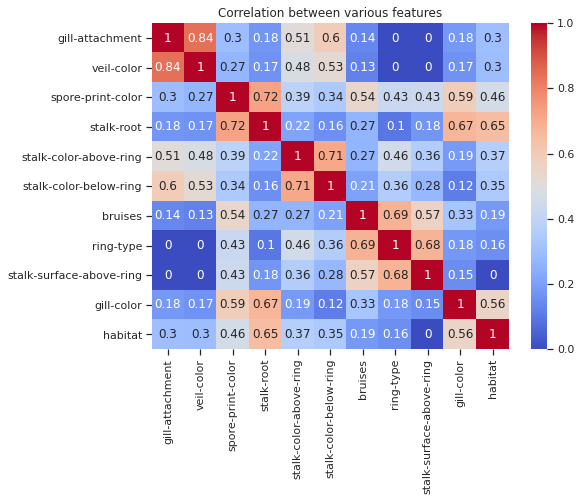

In [0]:
# Visualizing the correlation using heatmaps from seaborn library

highcorr = mrDataHighCorr.corr()
highcorr[np.abs(highcorr < 0.1)] = 0
plt.figure(figsize=(8,6))
sns.heatmap(highcorr, annot = True, cmap = 'coolwarm')
plt.title("Correlation between various features")
plt.show()

**Considering:** As the highest correlation is not above 90%, we decided to include all the attributes in the modelling. However, after modelling as per the CRISP-DM3 methodology one of the highly correlated factors can be removed and analysed for model's performance and generalization.

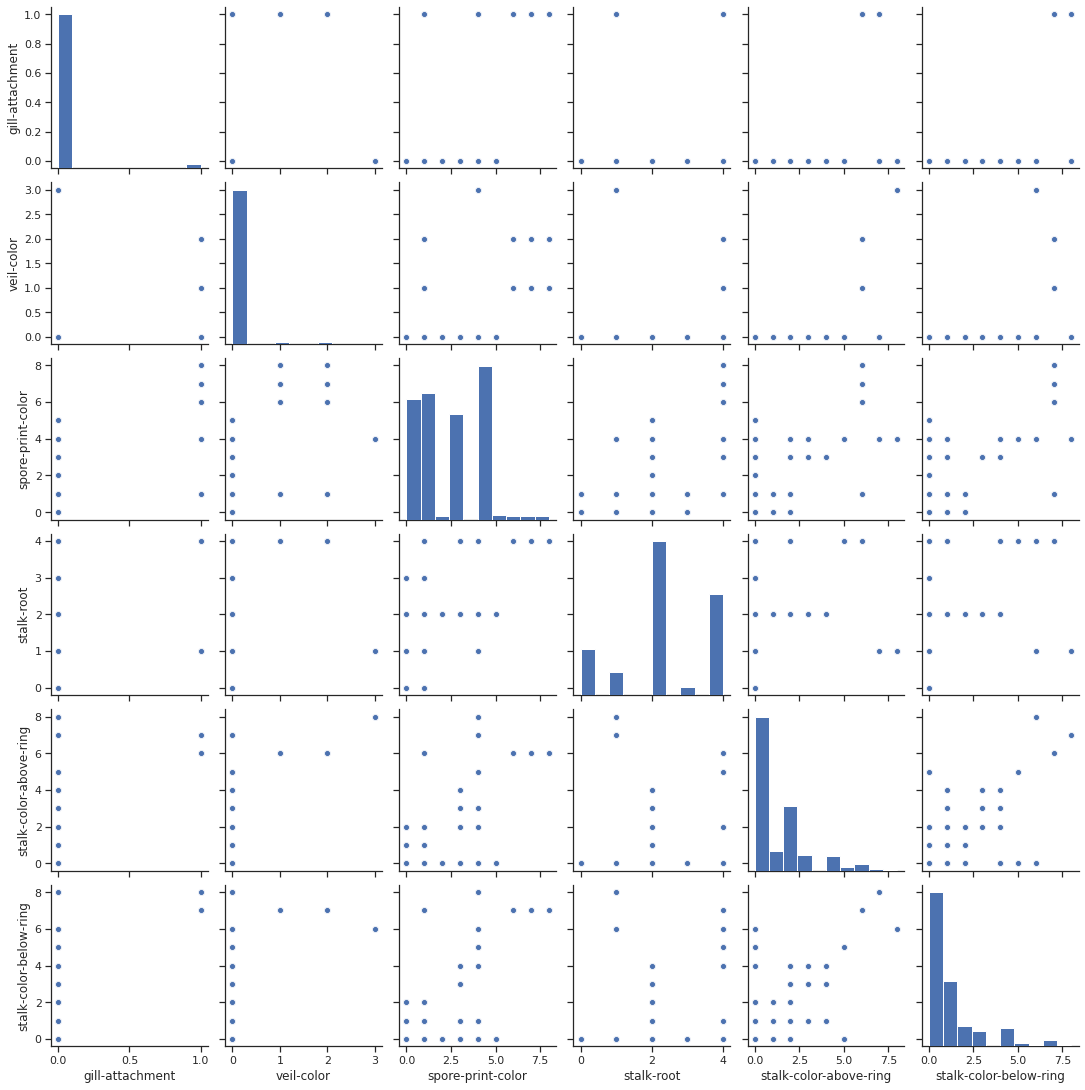

In [0]:
# Visualizing the correlation using scatterplot from seaborn library
#Scatter matrix of the highly correlated factors for better visualization
import seaborn as sns
#sns.set(style="ticks")
mrDataHighCorr = mrDataInput[['gill-attachment', 'veil-color', 'spore-print-color', 'stalk-root', 'stalk-color-above-ring', 'stalk-color-below-ring']]
sns.pairplot(mrDataHighCorr) 

## 2.4 Data Exploration

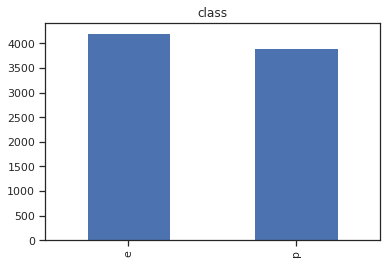

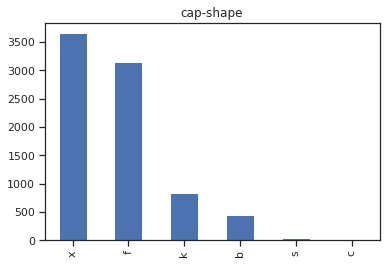

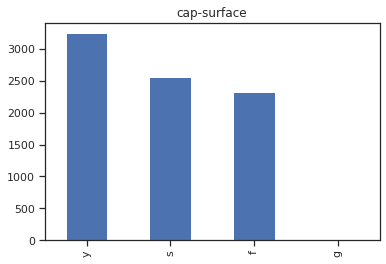

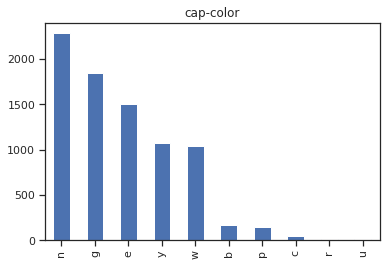

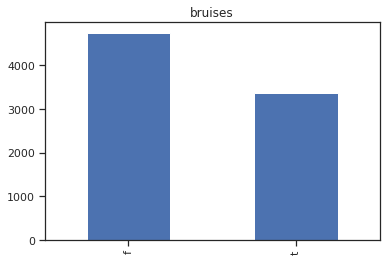

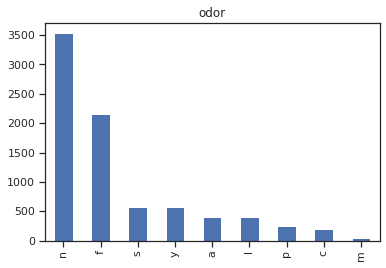

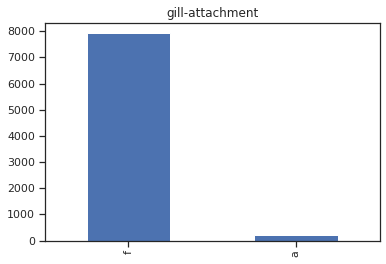

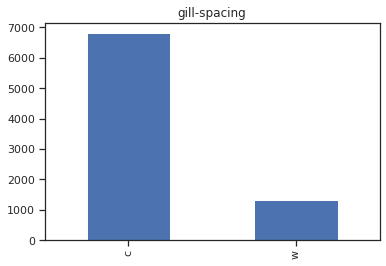

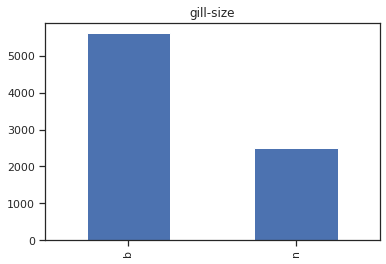

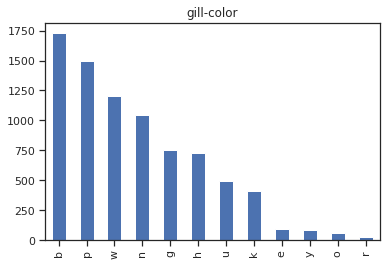

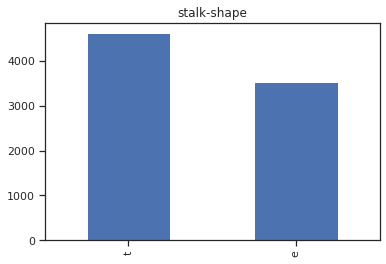

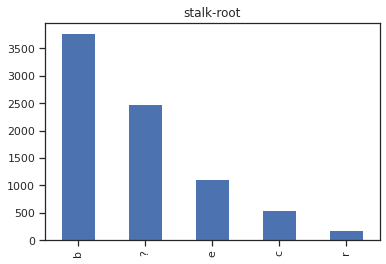

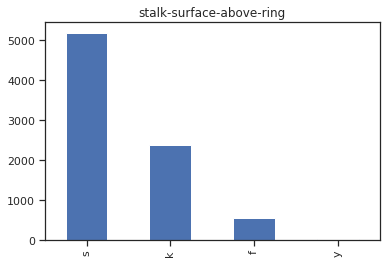

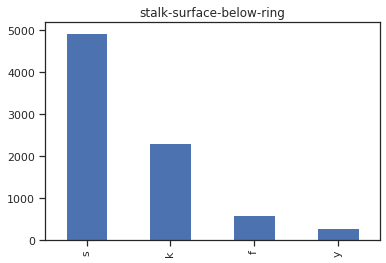

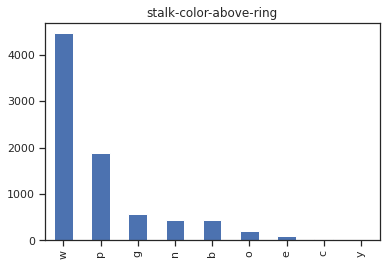

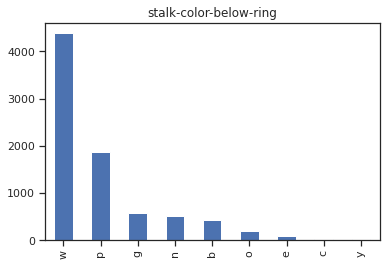

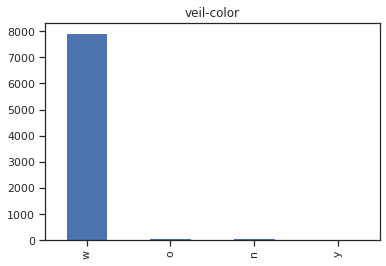

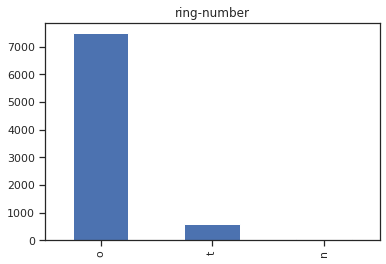

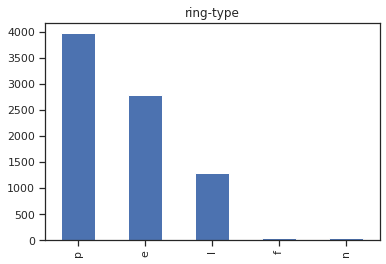

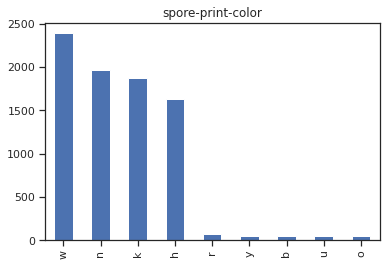

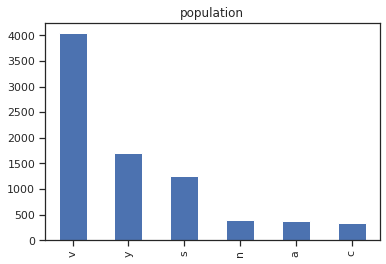

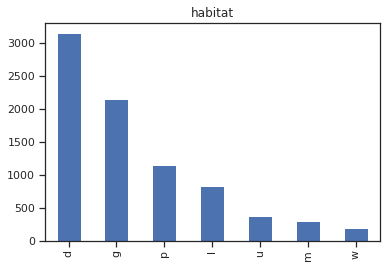

In [0]:
# The libraries used are numpy, seaborn, matplotlib which have been imported already for Dimensionality Reduction process.  
# ---------------------------------------------------------------------------------------------------------------------------------------------------------
# Plotting Bar Charts for exploring all the Attributes as all of them are categorical


for i in mushroomData:
    mushroomData[i].value_counts().plot.bar()
    plt.title(i)
    plt.show()
    print()


**Insight:** The attribute 'stalk-root' has '?' As an entry. The dataset description shows that '?' entry = missing values. These values need to be handled. 

**Actions and Justification:** 
A decision to remove the attribute "stalk-root" from the dataframe was made.
This missing value could have been imputed and could have included the "stalk-root" attribute in the modelling but keeping the below reasons in mind its decided not to:

1. We built classification models without considering "stalk-root" and the performance of the model and its ability to generalize is significant. Hence we decided to remove this attribute ('stalk-root') from the dataframe. 

2. The time spent on imputing this attribute when it is not going to significantly improve the modelling performance can be used elsewhere where more attention is needed.

**Considering:** There are many ways to handling missing values in Data Preparation and we worked on handling missing values using interpolate() in our other dataset "Life Expectancy"

In [0]:
# Dimensionality Reduction - continued, after gaining insight from exploration
# As per the above insight got from "Section 2.4 Data Exploration", we are dropping 'stalk-root' column from the dataframe

mushroomData = mushroomData.drop('stalk-root', axis = 1)


## 2.5 Data Preparation

In [0]:
# Section 2.5 Data Preparation
# To check for the data types and converting wrong data types to the right ones

mushroomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

**Insight:** All the columns have 'object' as their datatype. These needs to be converted to "Category"

In [0]:
# To convert "Object" datatype to "Category"

for i in mushroomData.columns:
  mushroomData[i] = mushroomData[i].astype('category')

mushroomData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-surface-above-ring  8124 non-null   category
 12  stalk-surface-below-ring  8124 non-null   category
 13  stalk-color-above-ring    8124 non-null   catego

In [0]:
# Export out the final Dataframe

mushroomData.to_csv("mushroomData.csv", index=False)

**Conclusion:** The Data Preparation and Data Understanding for "Mushroom Classification" dataset is done and "mushroomData.csv" can be used for further preprocessing and building ML models.

## 2.6 Data Visualization

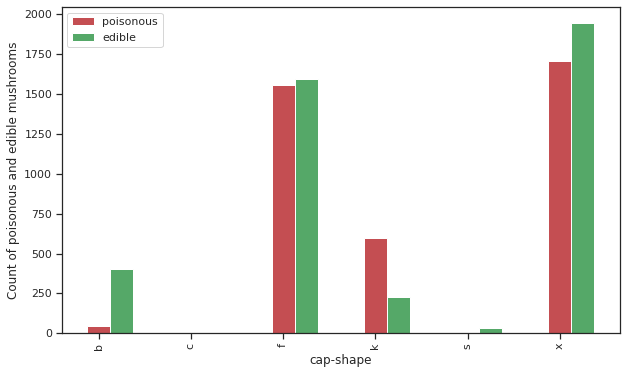

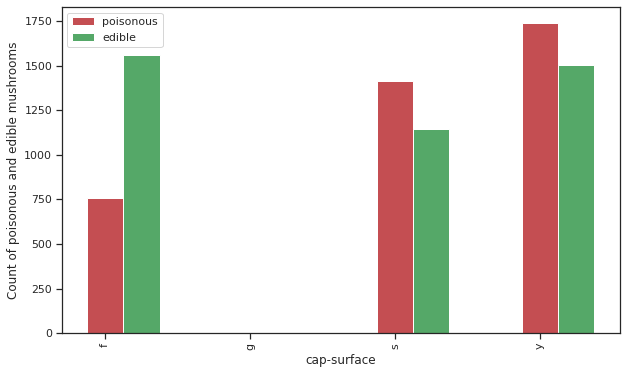

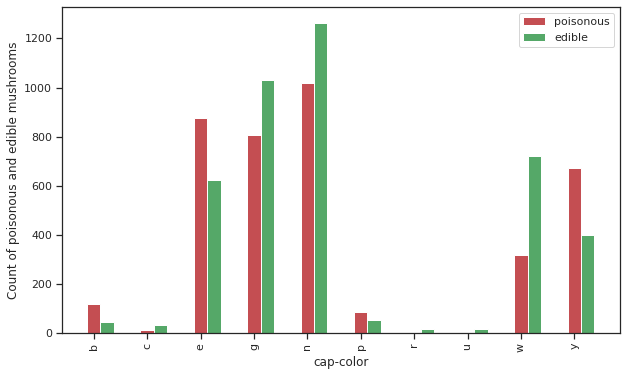

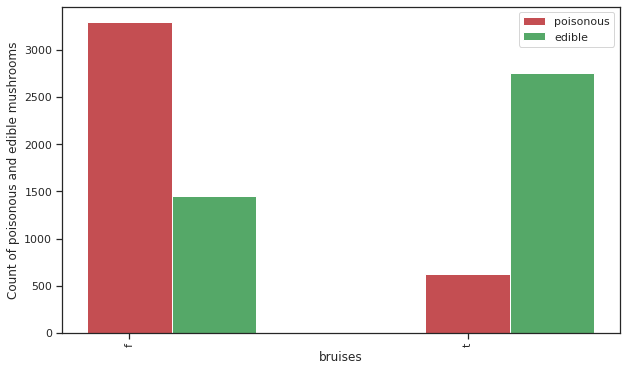

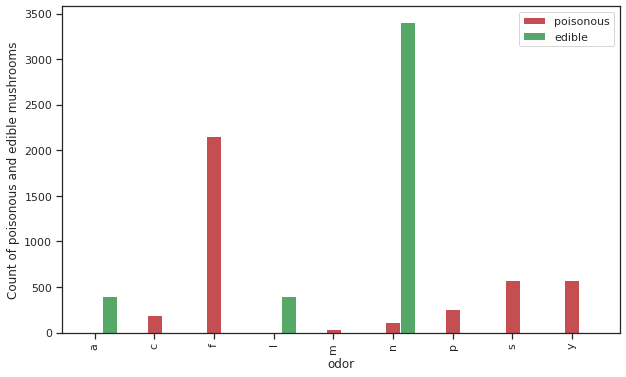

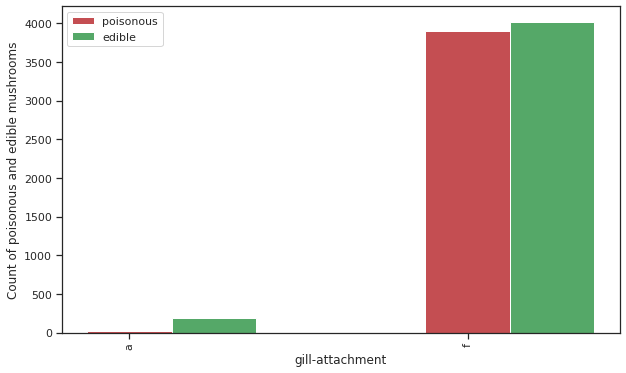

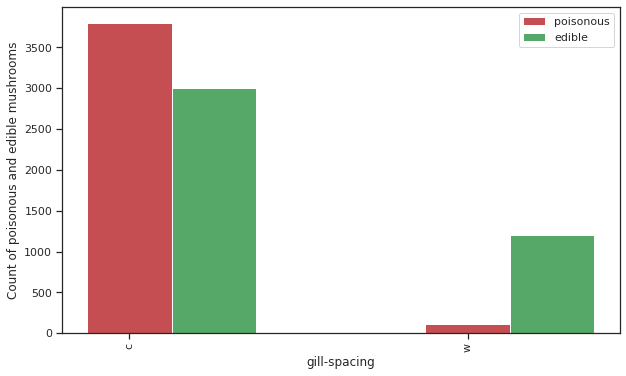

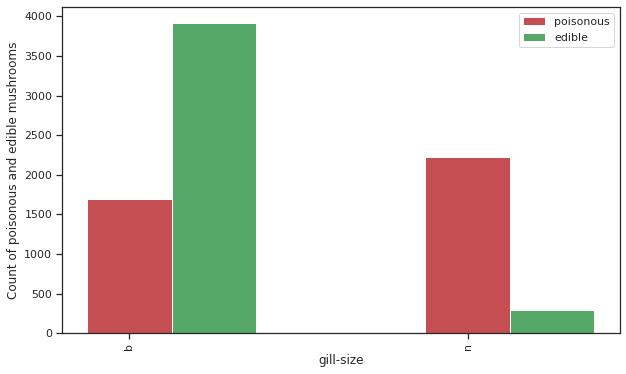

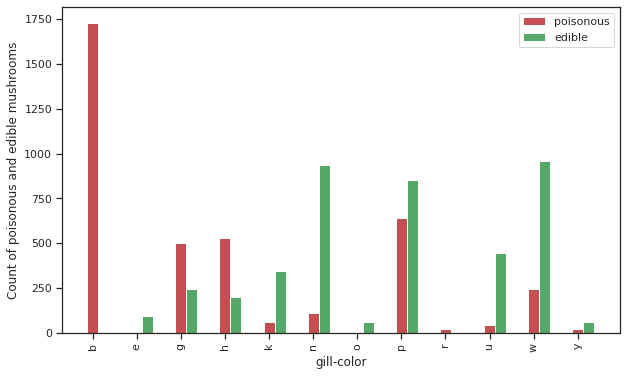

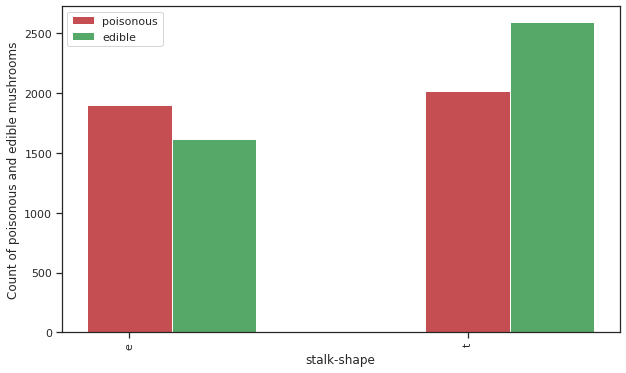

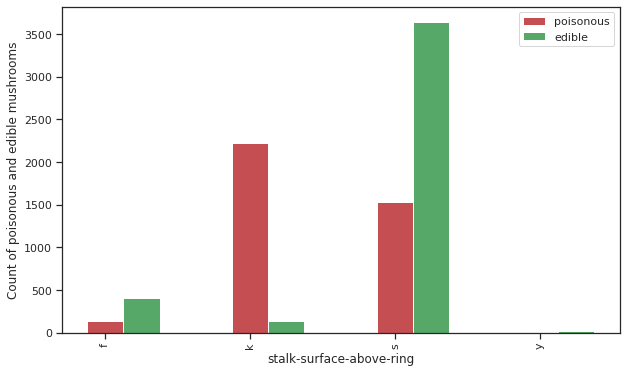

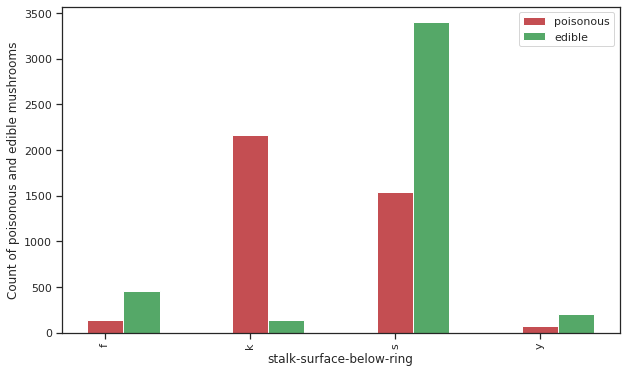

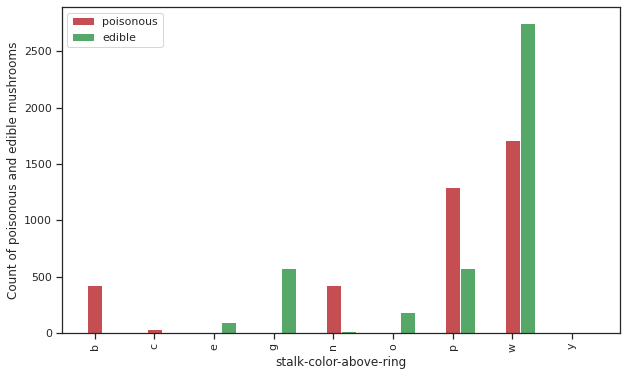

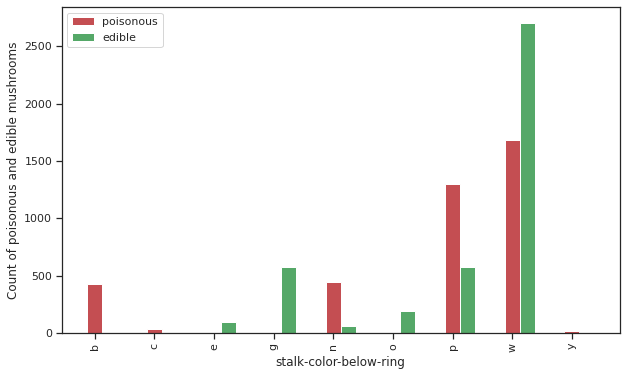

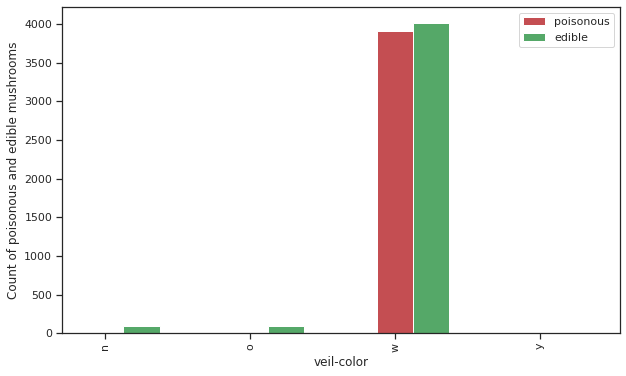

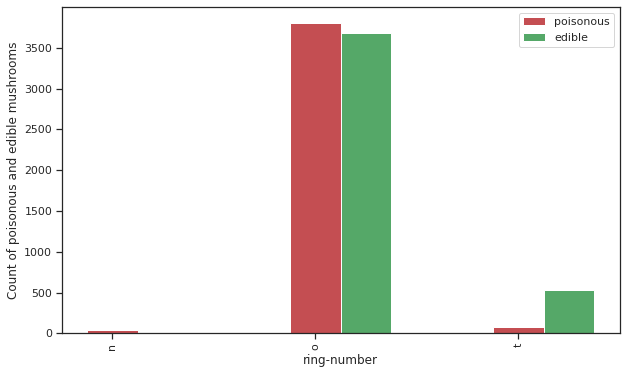

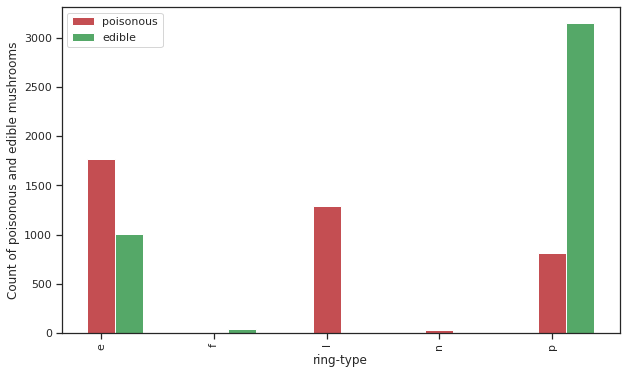

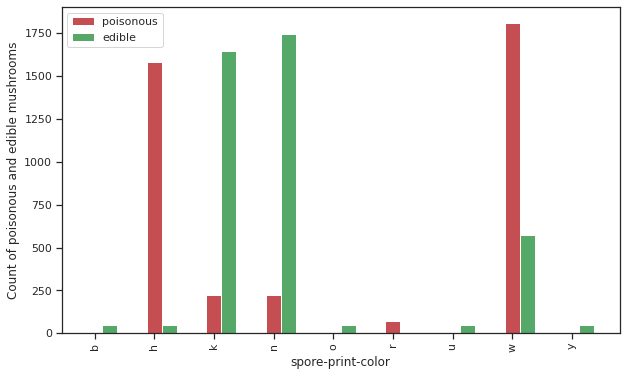

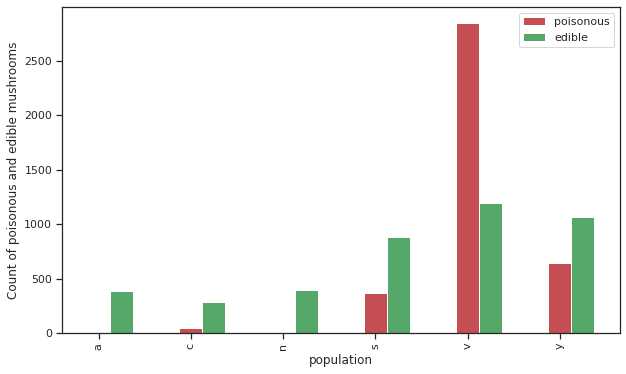

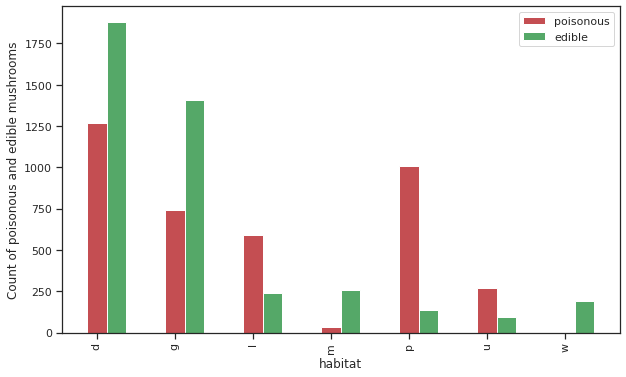

In [0]:
# To visualize the number of mushrooms of specific feature is poisonous or edible, we make use of the bar plot

# Creating a dataframe with mushrooms that are poisonous
poinsonous = mushroomData[mushroomData['class'] == 'p']

# Creating a dataframe with mushrooms that are edible
edible = mushroomData[mushroomData['class'] == 'e']

# A dataframe X that drops the target variable "class" 
X = mushroomData.drop(['class'], axis=1)

# Plotting each of the input variable against the count of mushrooms that are poisonous or edible

# Iterating all the columns of the X dataframe
for i in X.columns:
  plot_p = poinsonous.groupby(i)['class'].count()  
  plot_e = edible.groupby(i)['class'].count()  
  x = np.arange(len(plot_p)) 
  width = 0.25  
  plt.figure(figsize=(10,6))
  plt.bar(x, plot_p, width = width, label = "poisonous", color = 'r') 
  x2 = np.arange(len(plot_e))
  plt.bar(x2 + width, plot_e, width = width, label = "edible", color = 'g') 
  plt.legend()
  plt.xlabel(str(i))
  plt.ylabel('Count of poisonous and edible mushrooms')
  #plt.xticks(ticks=x, labels=plot_yes.index, rotation = 90)
  plt.xticks(ticks=x2, labels=plot_e.index, rotation = 90)
  plt.show()




# **3. CAR PRICE PREDICTION**

**DATA PREPARATION AND DATA UNDERSTANDING ON "CAR PRICE PREDICTION" DATASET**


---

3.1 Data Loading

3.2 Data Cleaning

3.3 Dimensionality Reduction

3.4 Data Exploration

3.5 Data Preparation

3.6 Data Visualization

---





## 3.1 Data Loading

In [0]:
# Importing Pandas Library - Each function from pandas is explained when those functions are used

import pandas as pd

# Click the run cell icon (play button icon) to run this code. Keyboard shortcut is Ctrl+Enter

In [0]:
# Before running this code, please upload the dataset. 
# To upload the dataset go to Files(the folder icon to the left)> Upload> choose Car Price Prediction dataset from your local drive
# Reading the CSV file using pandas.read_csv function and storing in cpData variable

cpData = pd.read_csv("/content/CarPrice.csv")

## 3.2 Data Cleaning


In [0]:
#Step 1 - Checking for missing values using DataFrame.isnull() function

cpData.isnull().values.any()

False

**Insight:** There are no missing values in "Car Price Prediction" dataset

In [0]:
# Step 2 - Checking for Duplicate records
# This is done by using <DataFrame.duplicated()> function from pandas library

cpData.duplicated().any()

False

**Insight:** There are no duplicate records in "Car Price Prediction" dataset

Further aspects of Data Cleaning are done under Dimensionality Reduction and Data preperation sections

## 3.3 Dimensionality Reduction

In [0]:
# Step 1 - To check for columns having unique values (Primary Key like Serial No.)
# ----------------------------------------------------------------------------------------------------------------
# Having a look into the dataset helps in Dimensionality Reduction
# Using DataFrame.head() function to have a look into the inital few rows and the columns in the dataframe

print(cpData.head(4))

   car_ID  symboling                   CarName  ... citympg highwaympg    price
0       1          3        alfa-romero giulia  ...      21         27  13495.0
1       2          3       alfa-romero stelvio  ...      21         27  16500.0
2       3          1  alfa-romero Quadrifoglio  ...      19         26  16500.0
3       4          2               audi 100 ls  ...      24         30  13950.0

[4 rows x 26 columns]


**Insight:** The column "price" is our target variable and the remaining columns are our input variables

In [0]:
# using DataFrame.info() function from pandas to know more about the dataset

cpData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1



**Insight:** There are 26 columns/attributes with 205 records/rows. The "car_ID" column of index 0 is most likely to be a primary key (having unique values)

In [0]:
# Step 1 - To check for columns having unique values (Primary Key like Serial No.)

for col in cpData.columns:
    c = pd.value_counts(cpData[col])
    cpUnique = pd.Series({"Column Name:": col, "Number of Unique entries:" : len(c)})
    print(cpUnique)
    print()

Column Name:                 car_ID
Number of Unique entries:       205
dtype: object

Column Name:                 symboling
Number of Unique entries:            6
dtype: object

Column Name:                 CarName
Number of Unique entries:        147
dtype: object

Column Name:                 fueltype
Number of Unique entries:           2
dtype: object

Column Name:                 aspiration
Number of Unique entries:             2
dtype: object

Column Name:                 doornumber
Number of Unique entries:             2
dtype: object

Column Name:                 carbody
Number of Unique entries:          5
dtype: object

Column Name:                 drivewheel
Number of Unique entries:             3
dtype: object

Column Name:                 enginelocation
Number of Unique entries:                 2
dtype: object

Column Name:                 wheelbase
Number of Unique entries:           53
dtype: object

Column Name:                 carlength
Number of Unique entries:      

**Insight 1:** The column car_ID has 205 unique entries and this column can be dropped because it not going to contribute to any learning for the model

**Insight 2:** There are other columns that have more than 140 unique values out of the 205 records. These columns/attributes could play major role in Machine learning and the number of unique values can be reduced by "Binning" which comes in the preprocessing step for the specific Algorithm


In [0]:
# Step 2 - To check for any column having only one value in more than 97% of the records (also called as "Low Variance Filter")
# Reference: https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d
# <To include: The explaination for the below codes>

num_rows = len(cpData.index)
rep_info_cols = []

for col in cpData.columns:
    counts = cpData[col].value_counts(dropna=False)
    top_percent = (counts/num_rows).iloc[0]
    
    if top_percent > 0.97:
        rep_info_cols.append(col)
        print('{0}:{1:.2f}%'.format(col, top_percent*100))
        print(counts)
        print()


enginelocation:98.54%
front    202
rear       3
Name: enginelocation, dtype: int64



**Insight:** The value "front" from the column "enginelocation" occurs more than 98% in all the 205 records which can be removed for data modelling as it is not going to contribute to the learning for modelling

In [0]:
# As per Step 1 and 2, two columns named "car_ID", "enginelocation" are dropped from the data frame

cpData = cpData.drop(['car_ID','enginelocation'], axis=1)


In [0]:
# Step 3 - High Correlation Filter
# Reference: https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

# To perform correlation calculation, first we drop the target variable and create a dataframe (cpDataInput) with only input variables

cpDataInput = cpData.drop('price', axis = 1)


In [0]:
# Visualizing the correlation between attributes using heatmap
# Importing seaborn library for heatmaps
# Importing pyplot from matplotlib for plotting heatmaps
# Importing numpy for getting absolute value in correlation matrix

import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


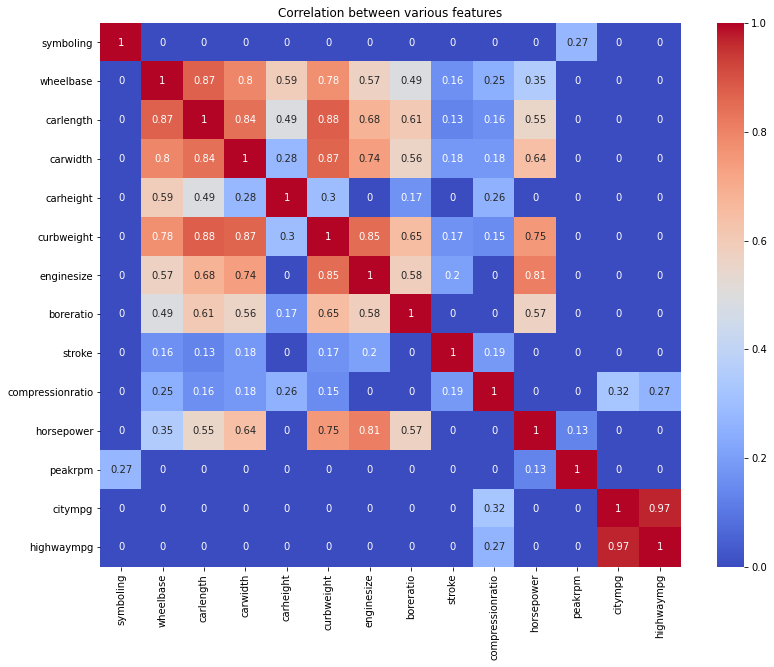

In [0]:
# The idea is to drop the columns that have high correlation.
# The below set of codes explain the following:
# Line 1 -> Correlation matrix is got using the DataFrame.corr() function and storing it in a variable(cpDataInput_corr)
# Line 2 -> As we are only looking for high correlation, the factors that have correlation less than 0.1 is equalled to 0
# Line 3 -> Gives the size of the graph(width, height)
# Line 4 -> using sns.heatmap(data) function to visualize the heatmap
# Line 5,6 -> Giving a title to the heatmap and showing the graph

cpDataInput_corr = cpDataInput.corr()
cpDataInput_corr[np.abs(cpDataInput_corr < 0.1)] = 0
plt.figure(figsize=(13,10))
sns.heatmap(cpDataInput_corr, annot = True, cmap = 'coolwarm')
plt.title("Correlation between various features")
plt.show()


**Insight:** The highly correlated attributes are "citympg" and "highwaympg" with 97% of correlation. 

Also, there are other columns that shows promising correlation around 70 - 87%


In [0]:
# To visualize only the highly correlated attributes using heatmaps
# To find the top correlated features we are sorting the correlation values with high to low

corr_matrix = cpDataInput.corr().abs() 
corrsort = cpDataInput.corr().unstack().sort_values(ascending = False).drop_duplicates() 
corrsort_df = pd.DataFrame(data=corrsort)
corrsort_df.head(15)


0
highwaympg highwaympg  1.000000
citympg    highwaympg  0.971337
curbweight carlength   0.877728
wheelbase  carlength   0.874587
carwidth   curbweight  0.867032
curbweight enginesize  0.850594
carlength  carwidth    0.841118
enginesize horsepower  0.809769
wheelbase  carwidth    0.795144
           curbweight  0.776386
horsepower curbweight  0.750739
carwidth   enginesize  0.735433
carlength  enginesize  0.683360
boreratio  curbweight  0.648480
carwidth   horsepower  0.640732

In [0]:
# Creating a dataframe with only the above specified columns and storing it in cpDataHighCorr

cpDataHighCorr = cpDataInput[['curbweight', 'carlength', 'wheelbase', 'carwidth', 'enginesize', 'horsepower', 'boreratio' ]]
cpDataHighCorr.head()


curbweight  carlength  wheelbase  ...  enginesize  horsepower  boreratio
0        2548      168.8       88.6  ...         130         111       3.47
1        2548      168.8       88.6  ...         130         111       3.47
2        2823      171.2       94.5  ...         152         154       2.68
3        2337      176.6       99.8  ...         109         102       3.19
4        2824      176.6       99.4  ...         136         115       3.19

[5 rows x 7 columns]

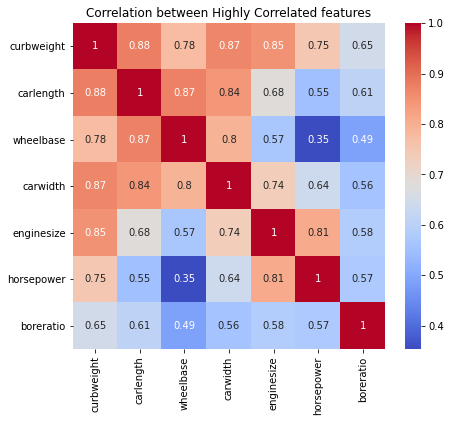

In [0]:
# Visualizing the correlation using heatmaps from seaborn library

highcorr = cpDataHighCorr.corr()
highcorr[np.abs(highcorr < 0.1)] = 0
plt.figure(figsize=(7,6))
sns.heatmap(highcorr, annot = True, cmap = 'coolwarm')
plt.title("Correlation between Highly Correlated features")
plt.show()

**Insight:** 

The other promising factors that show significant correlation are:

1. "carlength" and "curbweight" with 88%

2. "wheelbase" and "carlength" with 87%

3. "carwidth" and "curbweight" with 87%

4. "enginesize" and "curbweight" with 85%

5. "carwidth" and "carlength" with 84%

6. "horsepower" and "enginesize" with 84%

**Action and Justification:** Among the highly correlated factors ("citympg" and "highwaympg") we decided to remove the factor that has many input values compared to the other factor. Therefore, "highwaympg" is removed from the dataframe.

**Considering:** If to remove other correlated factors depends on how well the model learns and generalizes with or without the columns/attributed as per the CRISP-DM3 Methodology.



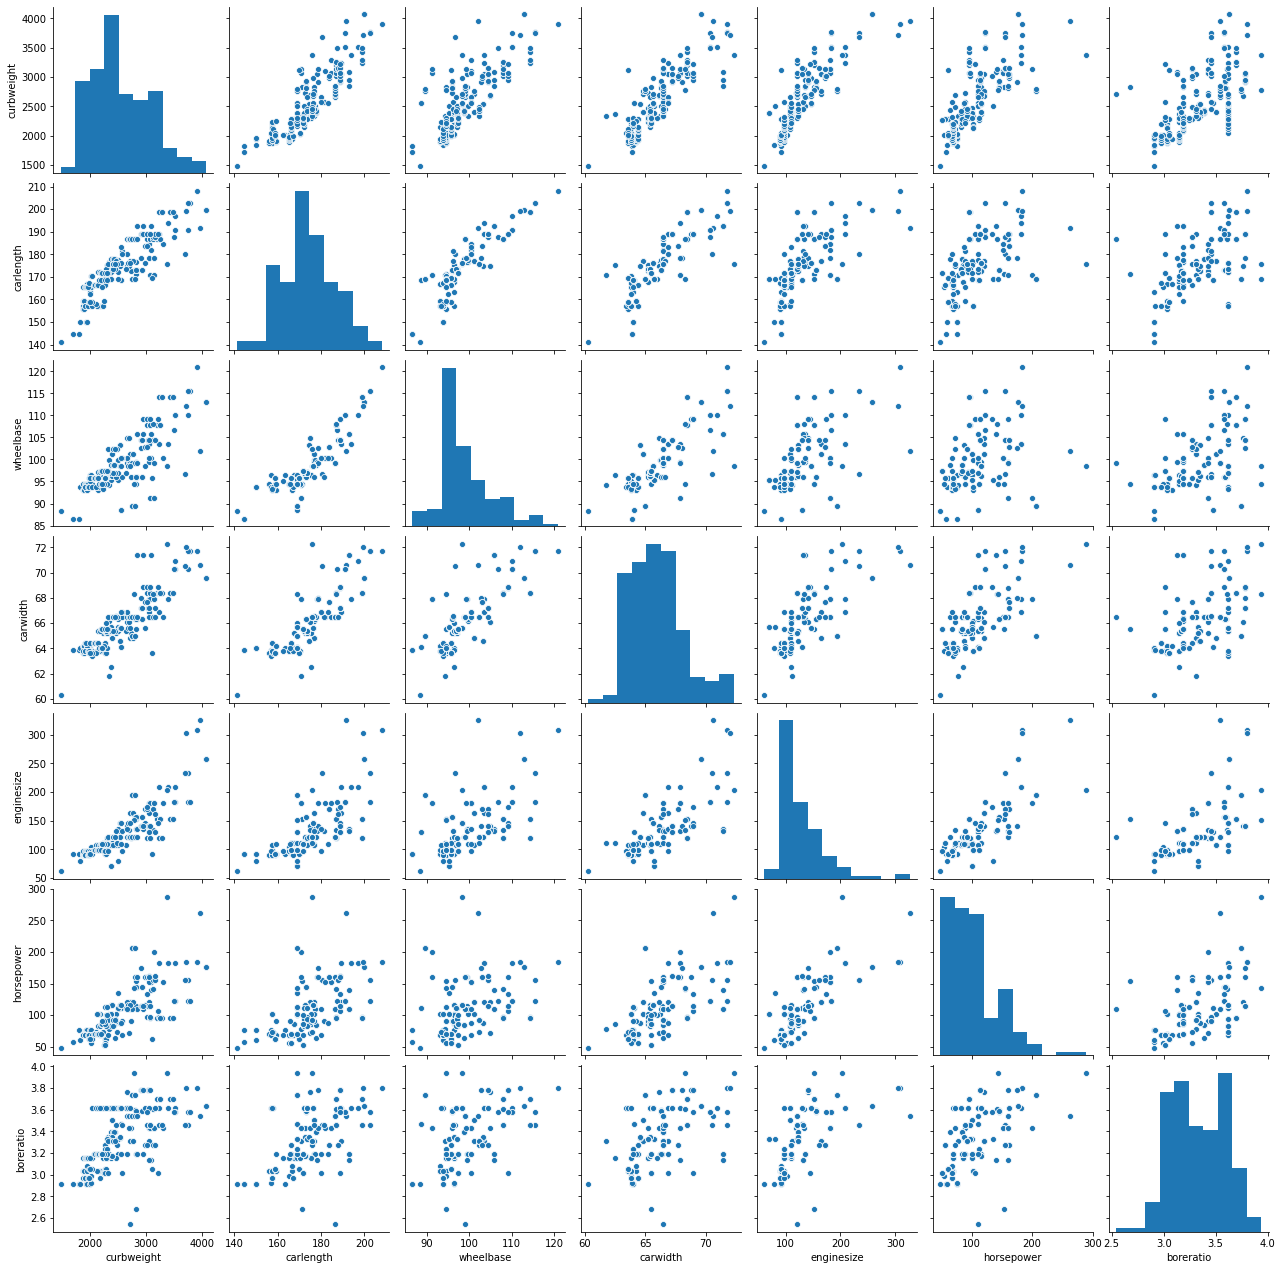

In [0]:
# To hide all the warnings for a neat presentation
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once') # uncomment to display the warnings once adn not repeatedly and comment the line just above

#Scatter matrix of the highly correlated factors for better visualization
import seaborn as sns
#sns.set(style="ticks")
cpDataHighCorr = cpData[['curbweight', 'carlength', 'wheelbase', 'carwidth', 'enginesize', 'horsepower', 'boreratio' ]]
sns.pairplot(cpDataHighCorr) 

In [0]:
# As per Step 3, "highwaympg" is dropped from the data frame

cpData = cpData.drop(['highwaympg'], axis=1)

In [0]:
# Step 4 - Creating new variable called "carcompany" for easier interpretation
# Getting Car Company from the CarName  
# Renaming the typo errors in Car Company names

carcompany = cpData['CarName'].str.split(' ', expand=True)
cpData['carcompany'] = carcompany[0]
cpData['carcompany'].unique()

cpData['carcompany'] = cpData['carcompany'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 
                                                     'toyouta': 'toyota', 'vokswagen': 'volkswagen', 
                                                     'vw': 'volkswagen'})

In [0]:
# "CarName" is dropped from the data frame as we will be using "carcompany" instead

cpData = cpData.drop(['CarName'], axis=1)

## 3.4 Data Exploration 

In [0]:
# To explore the attributes having numeric and categorical values seperately, we are creating one dataframe for numeric and another for categorical
# The libraries used are numpy, seaborn, matplotlib which have been imported already for Dimensionality Reduction process.  
# ---------------------------------------------------------------------------------------------------------------------------------------------------------
# Attributes with only numeric values are stored in cp_numeric array

cp_numeric = cpData.select_dtypes(include = [np.number])
cp_numeric = cp_numeric.columns.values
cp_numeric

array(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'price'],
      dtype=object)

In [0]:
# Attributes with only categorical values are stored in cp_categoric array

cp_categoric = cpData.select_dtypes(exclude = [np.number])
cp_categoric = cp_categoric.columns.values
cp_categoric


array(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginetype', 'cylindernumber', 'fuelsystem', 'carcompany'],
      dtype=object)

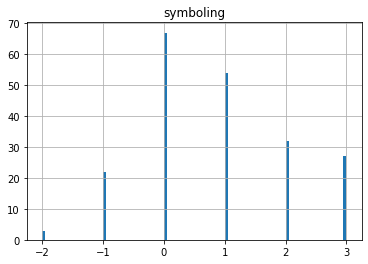

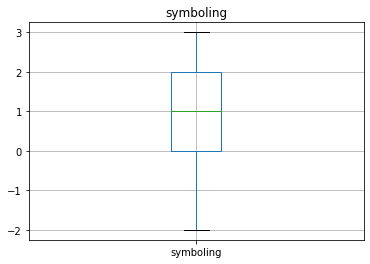

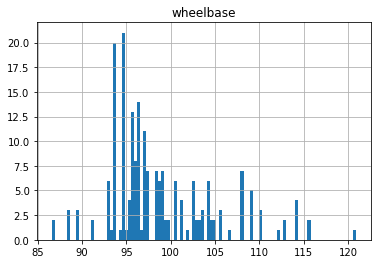

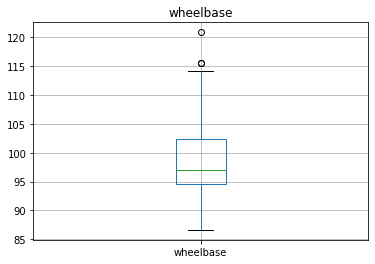

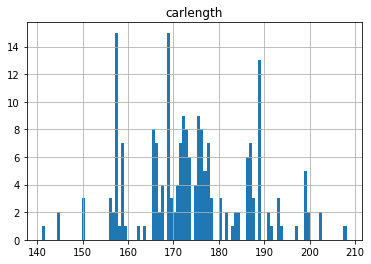

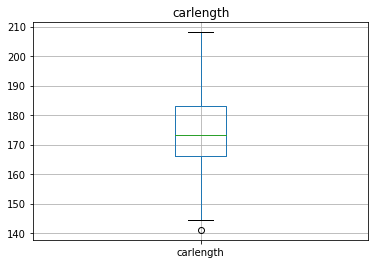

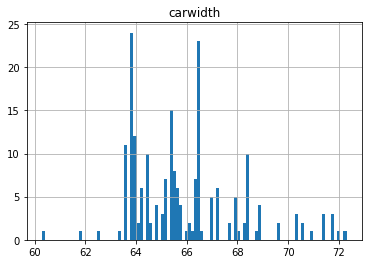

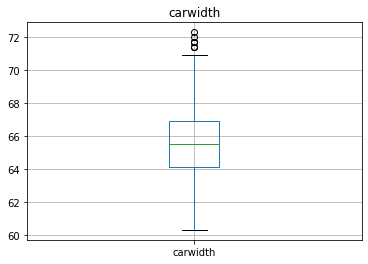

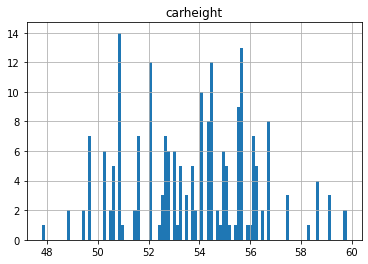

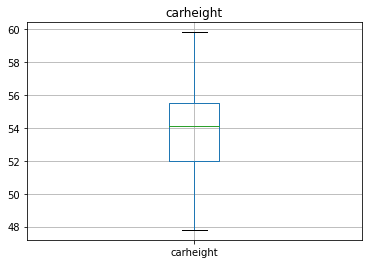

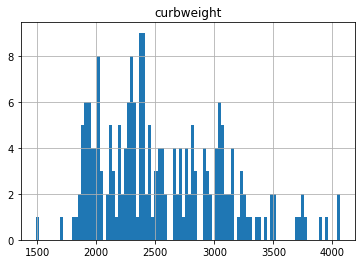

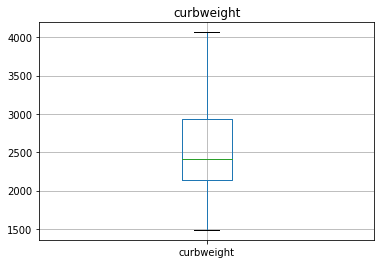

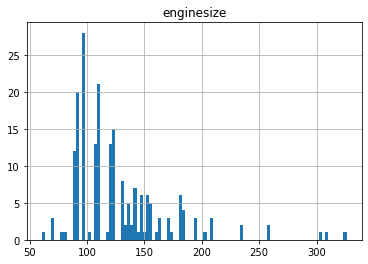

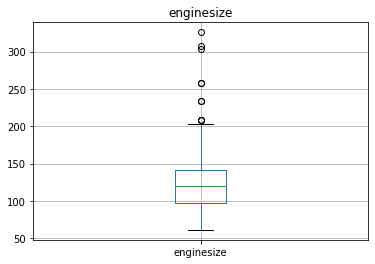

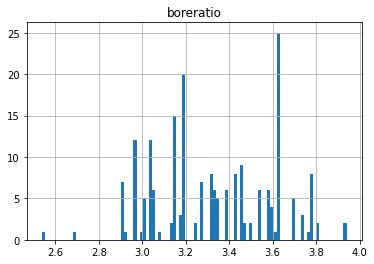

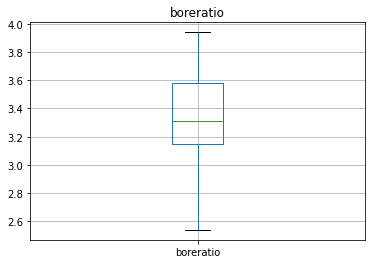

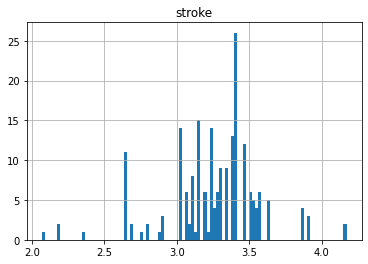

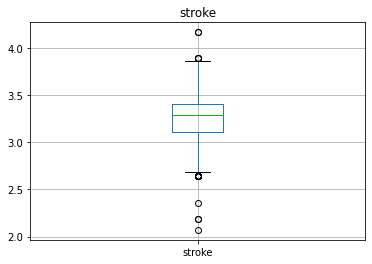

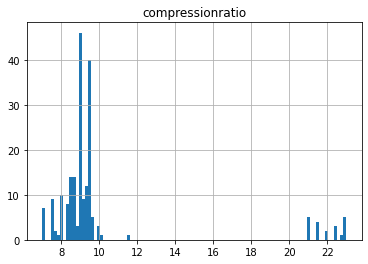

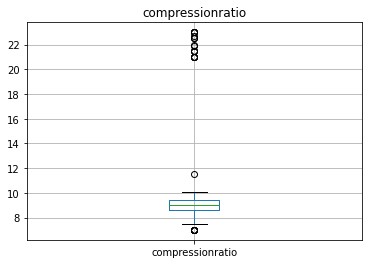

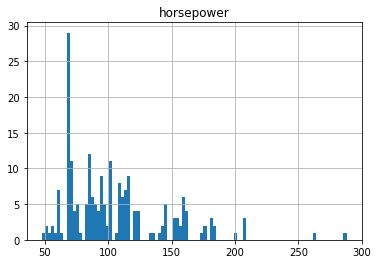

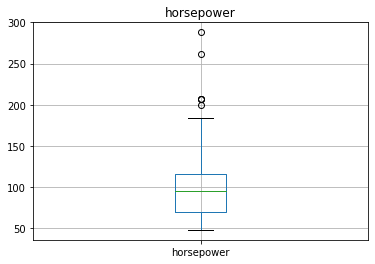

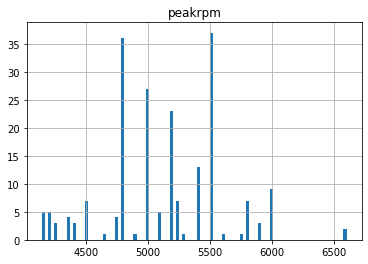

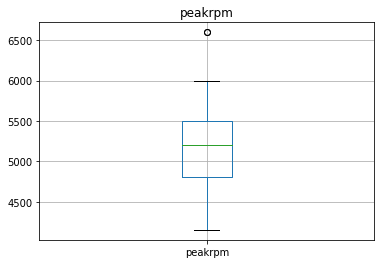

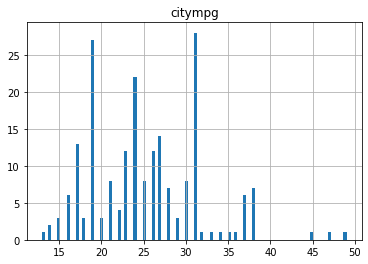

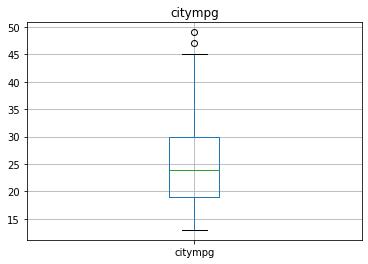

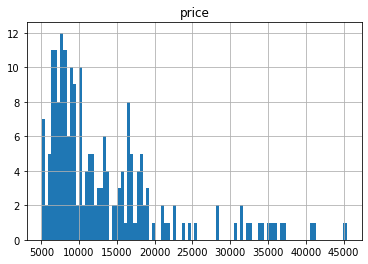

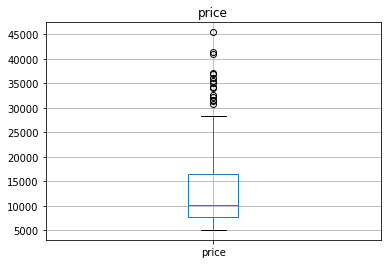

In [0]:
# Plotting Histogram and box plot graphs for Numeric Attributes

for i in cp_numeric:
    cpData[i].hist(bins=100)
    plt.title(i)
    plt.show()
    print()
    cpData.boxplot(column = [i])
    plt.title(i)
    plt.show()
    print()

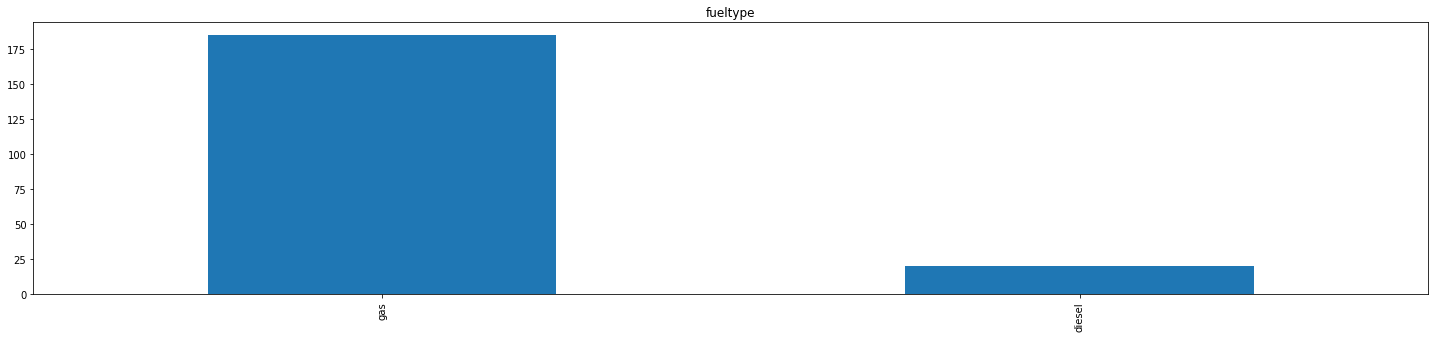

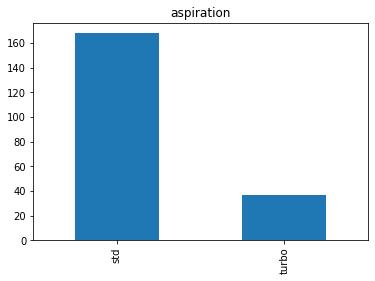

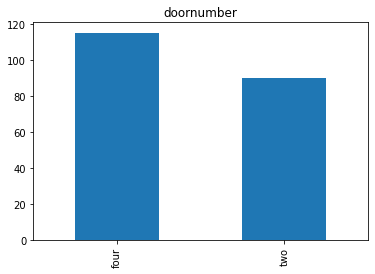

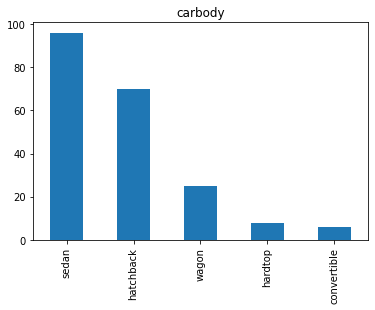

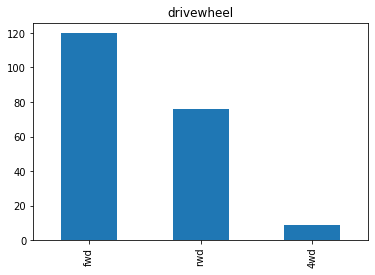

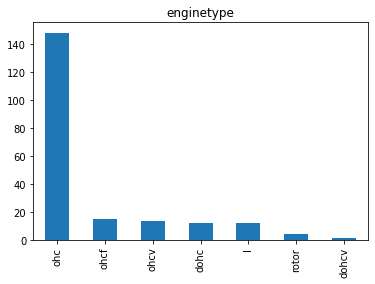

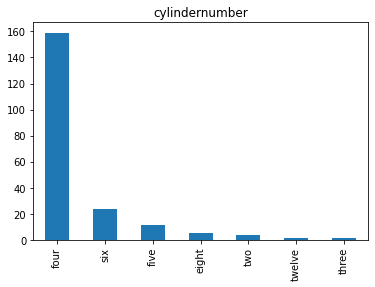

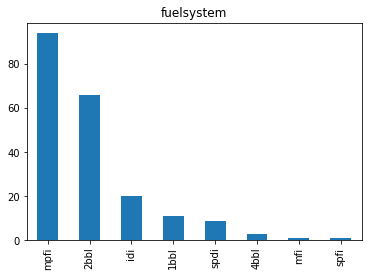

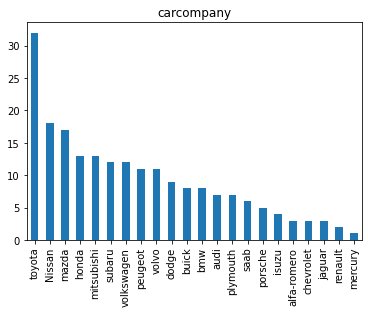

In [0]:
# Plotting Bar Charts for exploring Categorical Attributes

plt.figure(figsize=(25, 5))
for i in cp_categoric:
    cpData[i].value_counts().plot.bar()
    plt.title(i)
    plt.show()
    print()

## 3.5 Data Preparation

In [0]:
# To check for the data types and converting wrong data types to the right ones

cpData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

**Insight:** The below mentioned columns have dataype as "Object" which can be changed to "Category" which helps in reducing the size of the dataframe thereby making computations faster.

From "Object" to "Category": carcompany, fueltype, aspiration, doornumber, carbody, drivewheel, enginetype, cylindernumber, fuelsystem


In [0]:
for i in cp_categoric:
  cpData[i] = cpData[i].astype('category')

cpData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         205 non-null    int64   
 1   fueltype          205 non-null    category
 2   aspiration        205 non-null    category
 3   doornumber        205 non-null    category
 4   carbody           205 non-null    category
 5   drivewheel        205 non-null    category
 6   wheelbase         205 non-null    float64 
 7   carlength         205 non-null    float64 
 8   carwidth          205 non-null    float64 
 9   carheight         205 non-null    float64 
 10  curbweight        205 non-null    int64   
 11  enginetype        205 non-null    category
 12  cylindernumber    205 non-null    category
 13  enginesize        205 non-null    int64   
 14  fuelsystem        205 non-null    category
 15  boreratio         205 non-null    float64 
 16  stroke            205 non-

In [0]:
# From the varaible 'length' deriving new variable named Size where cars are classified as large or small according to length 
cpData['Size'] = np.where(cpData['carlength']>=170, 'large', 'small')
cpData

symboling fueltype aspiration  ...    price   carcompany   Size
0            3      gas        std  ...  13495.0  alfa-romero  small
1            3      gas        std  ...  16500.0  alfa-romero  small
2            1      gas        std  ...  16500.0  alfa-romero  large
3            2      gas        std  ...  13950.0         audi  large
4            2      gas        std  ...  17450.0         audi  large
..         ...      ...        ...  ...      ...          ...    ...
200         -1      gas        std  ...  16845.0        volvo  large
201         -1      gas      turbo  ...  19045.0        volvo  large
202         -1      gas        std  ...  21485.0        volvo  large
203         -1   diesel      turbo  ...  22470.0        volvo  large
204         -1      gas      turbo  ...  22625.0        volvo  large

[205 rows x 24 columns]

In [0]:
# Export out the final Dataframe

cpData.to_csv("cpData.csv", index=False)

**Conclusion:** The Data Preperation and Data Understanding for "Car Price Prediction" dataset is done and "cpData.csv" can be used for further preprocessing and building ML models.

## 3.6 Data Visualization

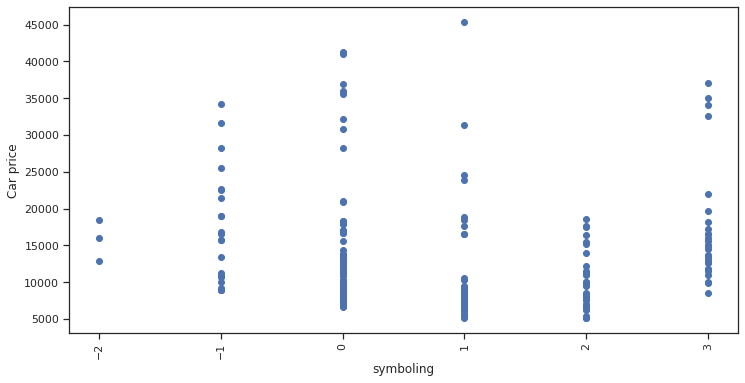

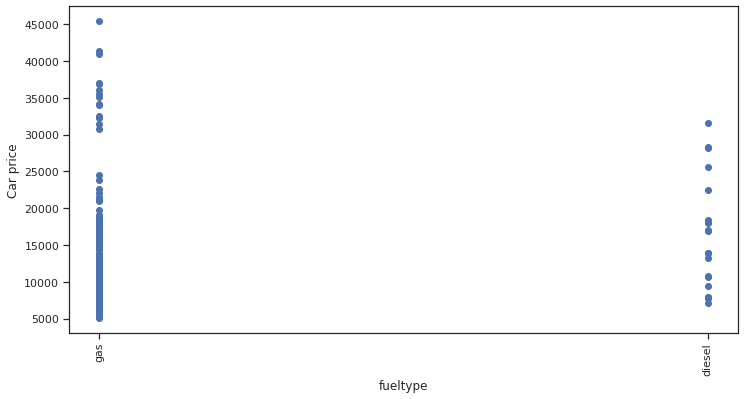

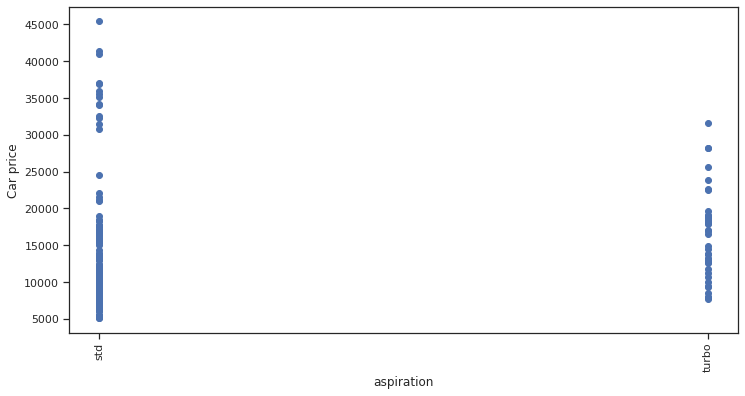

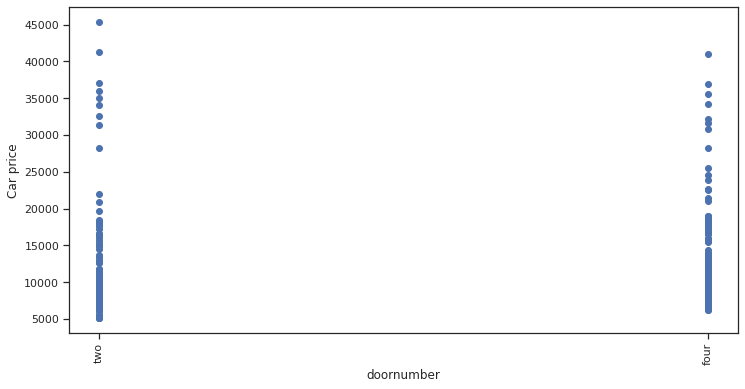

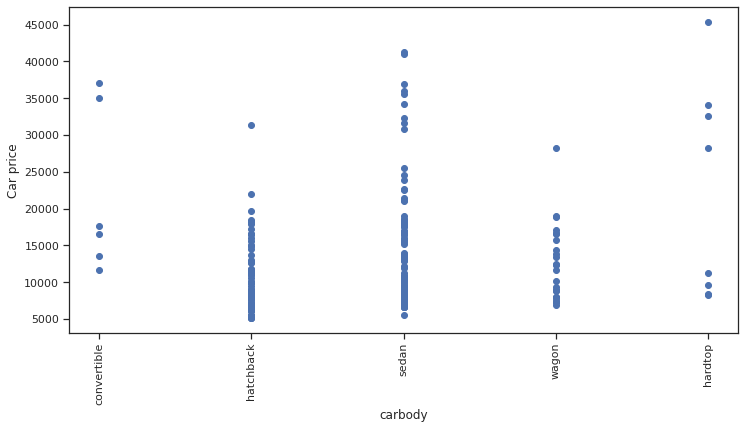

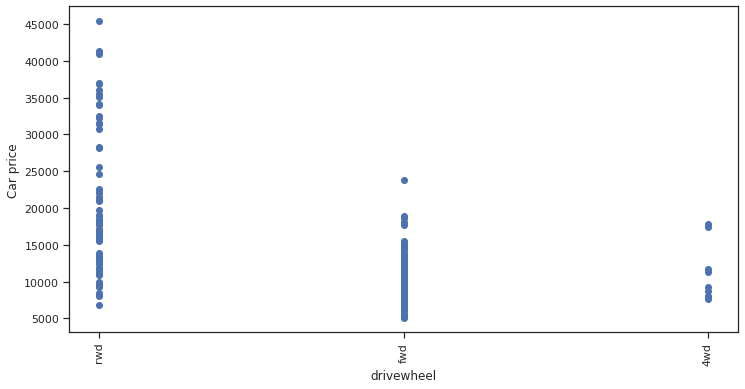

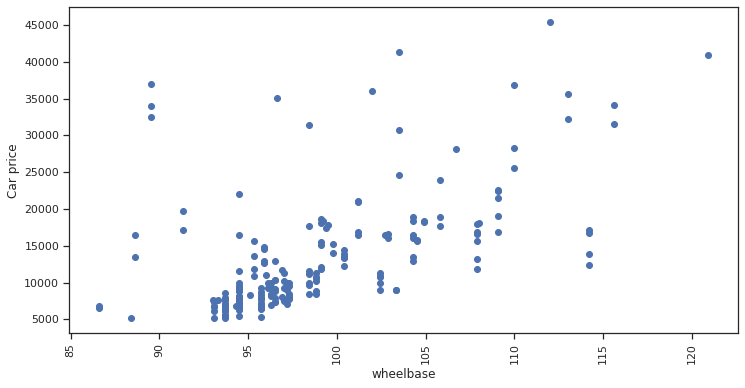

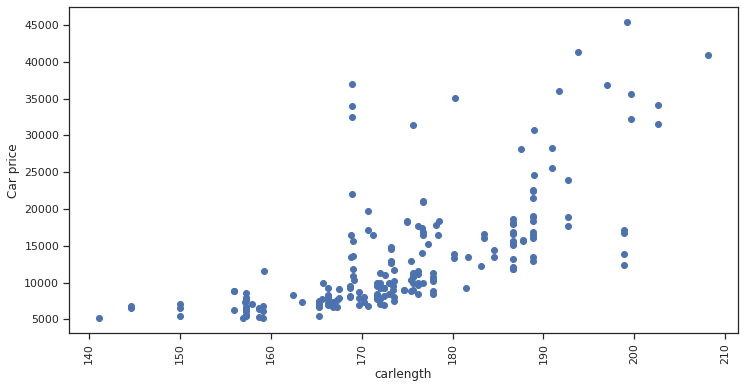

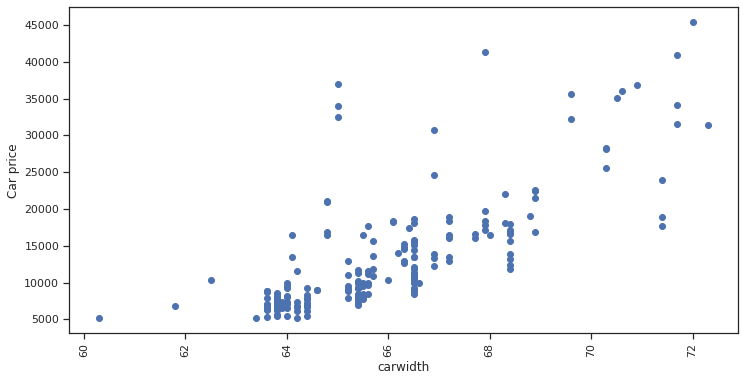

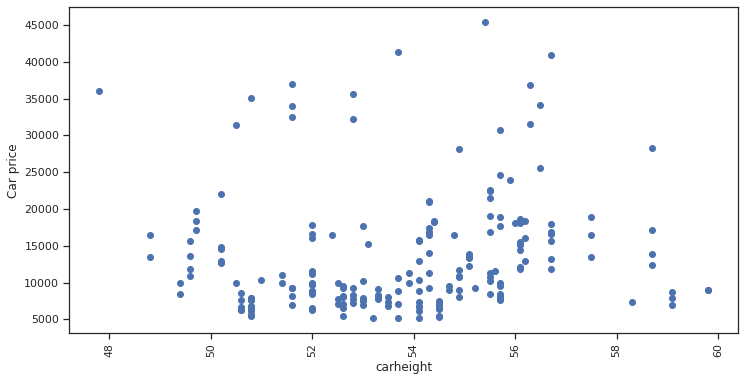

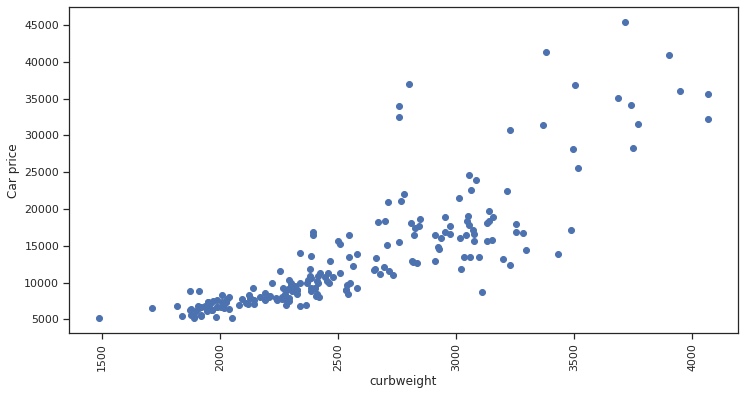

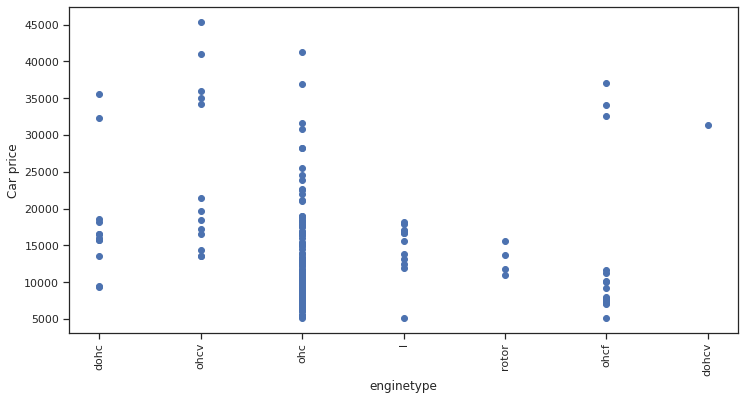

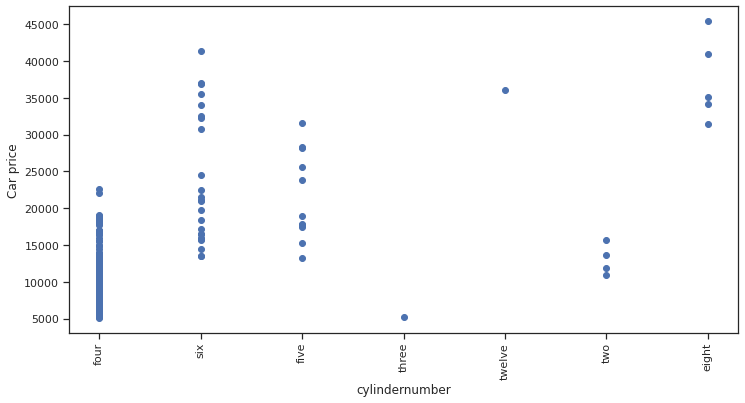

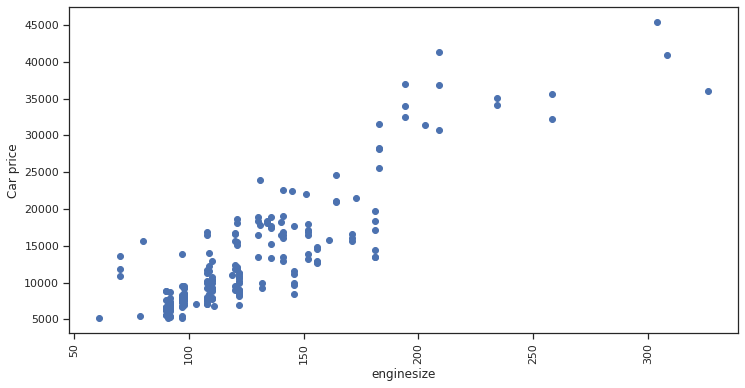

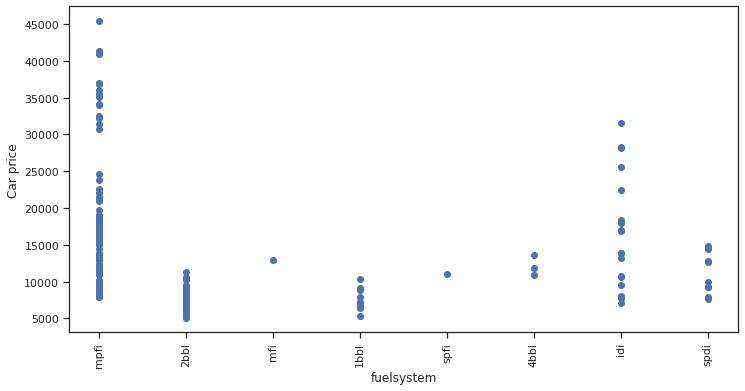

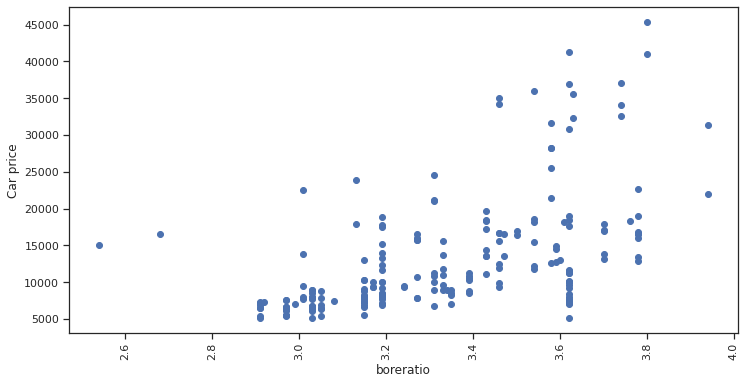

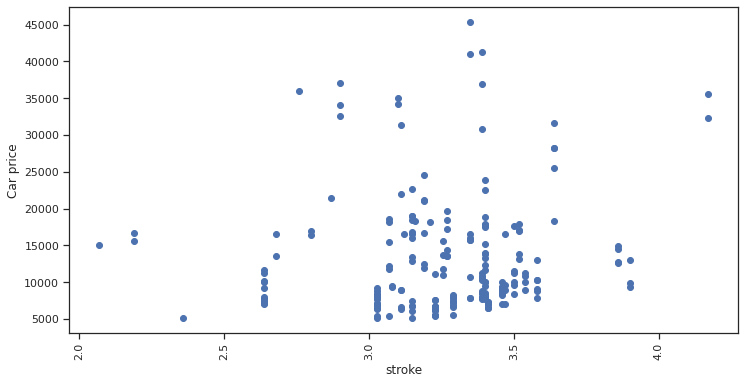

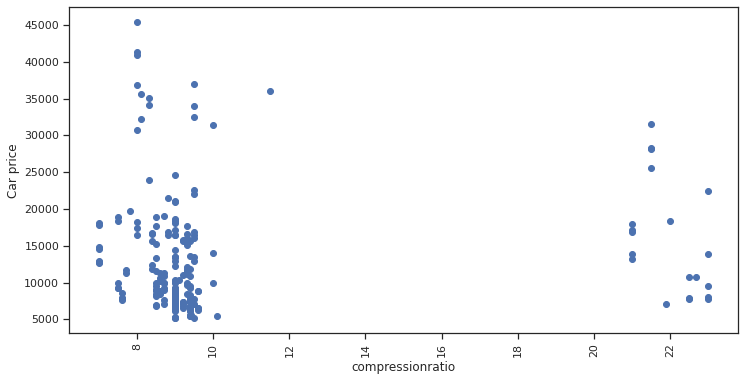

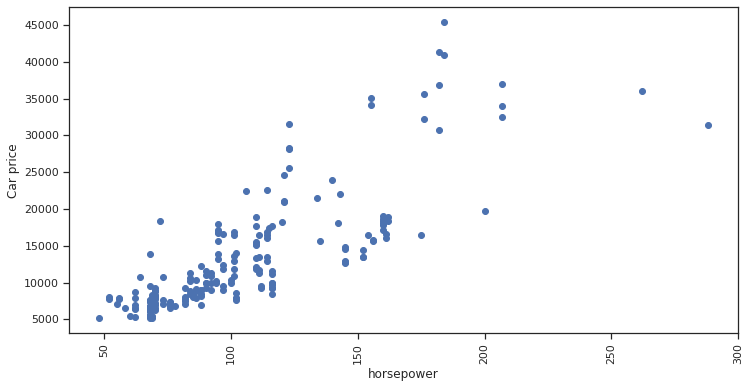

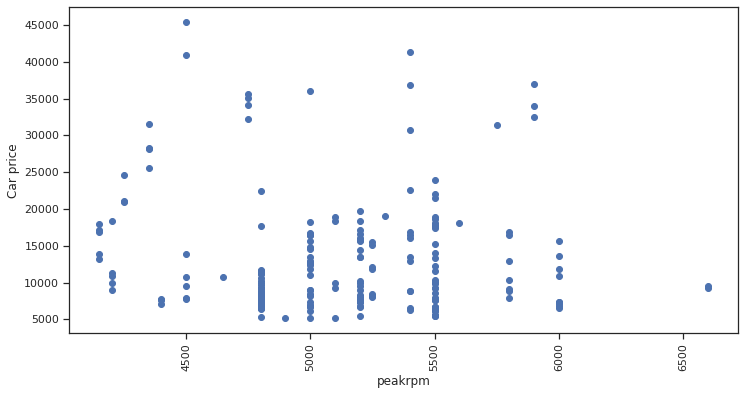

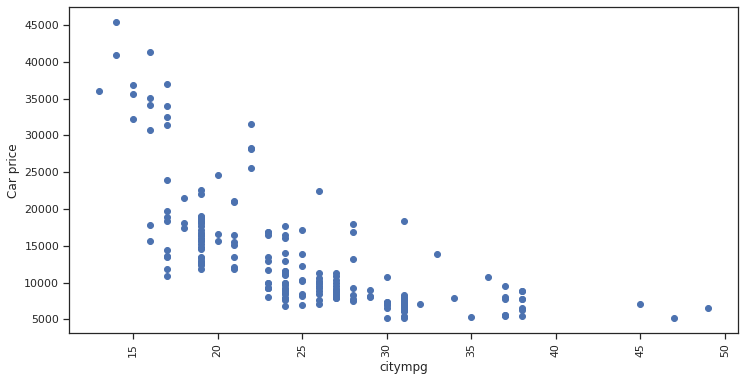

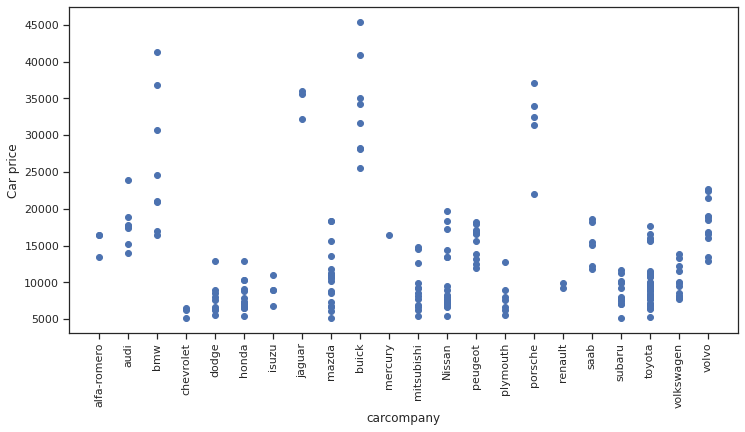

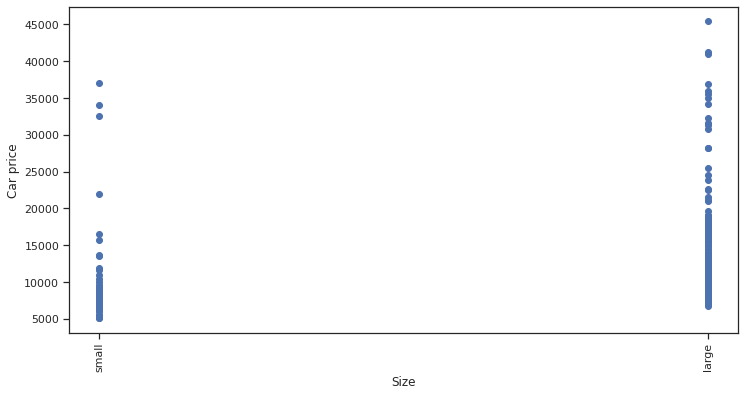

In [0]:
#Plotting scatter plot for each input variable against the output variable "price"

x = cpData.drop(['price'], axis=1)
y = cpData['price']


for i in x.columns:
  plt.figure(figsize=(12,6))
  plt.scatter(x[i], y)
  plt.xlabel(i)
  plt.ylabel("Car price")
  plt.xticks(rotation=90) 
  plt.show()
  print()
 


# **4. LIFE EXPECTANCY**

**DATA PREPARATION AND DATA UNDERSTANDING ON "LIFE EXPECTANCY" DATASET**


---

4.1 Data Loading

4.2 Data Cleaning

4.3 Dimensionality Reduction

4.4 Data Exploration

4.5 Data Preparation

4.6 Data Visualization


---





## 4.1 Data Loading

In [0]:
# Importing Pandas Library - Each function from pandas is explained when those functions are used

import pandas as pd

# Click the run cell icon (play button icon) to run this code. Keyboard shortcut is Ctrl+Enter

In [0]:
# Before running this code, please upload the dataset. 
# To upload the dataset go to Files(the folder icon to the left)> Upload> choose Car Price Prediction dataset from your local drive
# Reading the CSV file using pandas.read_csv function and storing in cpData variable

lifeData = pd.read_csv("/content/LifeExpectancy.csv")

## 4.2 Data Cleaning


In [0]:
# Step 1 - Renaming Column Names

lifeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [0]:
# Step 1 (continued) - Renaming the column names that contain trailing spaces.

lifeData.rename(columns={"Life expectancy ":"LifeExpectancy", "Adult Mortality":"AdultMortality",
                               "infant deaths":"InfantDeaths", "percentage expenditure":"PercentageExp",
                               "Hepatitis B":"HepatitisB", "Measles ":"Measles", " BMI ":"BMI",
                               "under-five deaths ":"UnderFiveDeaths", "Total expenditure":"TotExp", 
                               "Diphtheria ":"Diphtheria", " HIV/AIDS":"HIV/AIDS", 
                               " thinness  1-19 years":"thinness1to19years", " thinness 5-9 years":"thinness5to9years", 
                               "Income composition of resources":"IncomeCompOfResources"},inplace=True)

In [0]:
# Step 2 - Checking for missing values using DataFrame.isnull() function

lifeData.isnull().values.any()

True

**Insight:** There are missing values in "Life Expectancy" dataset

In [0]:
# Step 3 - Checking for the percentage of missing values in the dataset

lifeData.isnull().sum()*100/lifeData.isnull().count()

Country                   0.000000
Year                      0.000000
Status                    0.000000
LifeExpectancy            0.340368
AdultMortality            0.340368
InfantDeaths              0.000000
Alcohol                   6.603131
PercentageExp             0.000000
HepatitisB               18.822328
Measles                   0.000000
BMI                       1.157250
UnderFiveDeaths           0.000000
Polio                     0.646698
TotExp                    7.692308
Diphtheria                0.646698
HIV/AIDS                  0.000000
GDP                      15.248468
Population               22.191967
thinness1to19years        1.157250
thinness5to9years         1.157250
IncomeCompOfResources     5.684139
Schooling                 5.547992
dtype: float64

**Insight:** There are three main columns that have more than 15% of its data missing such as HepatitisB, GDP, Population

**Action & Justification:** It was decided to impute these values as they are important features that could determine the output variable - LifeExpectancy. Other columns having null values are replaced with their mean values

In [0]:
# Replacing the missing values in below mentioned columns with their mean values

columns = ['LifeExpectancy', 'AdultMortality', 'Alcohol', 'BMI',  'Polio', 'TotExp', 'Diphtheria',  'thinness1to19years', 'thinness5to9years', 'IncomeCompOfResources', 'Schooling']

for i in columns:
  lifeData[i].fillna(lifeData[i].mean(), inplace=True)



In [0]:
# Checking for the null values in the columns

lifeData.isnull().sum()*100/lifeData.isnull().count()

Country                   0.000000
Year                      0.000000
Status                    0.000000
LifeExpectancy            0.000000
AdultMortality            0.000000
InfantDeaths              0.000000
Alcohol                   0.000000
PercentageExp             0.000000
HepatitisB               18.822328
Measles                   0.000000
BMI                       0.000000
UnderFiveDeaths           0.000000
Polio                     0.000000
TotExp                    0.000000
Diphtheria                0.000000
HIV/AIDS                  0.000000
GDP                      15.248468
Population               22.191967
thinness1to19years        0.000000
thinness5to9years         0.000000
IncomeCompOfResources     0.000000
Schooling                 0.000000
dtype: float64

**Comments:** Only the three main columns have null values and all other columns which had null values have been replaced with the mean values

In [0]:
lifeData.isnull().sum()

Country                    0
Year                       0
Status                     0
LifeExpectancy             0
AdultMortality             0
InfantDeaths               0
Alcohol                    0
PercentageExp              0
HepatitisB               553
Measles                    0
BMI                        0
UnderFiveDeaths            0
Polio                      0
TotExp                     0
Diphtheria                 0
HIV/AIDS                   0
GDP                      448
Population               652
thinness1to19years         0
thinness5to9years          0
IncomeCompOfResources      0
Schooling                  0
dtype: int64

In [0]:
# Step4 - Handling Null values - using Interpolate
country = lifeData.Country.unique()
column = ['LifeExpectancy','AdultMortality','Alcohol','HepatitisB','BMI','Polio','TotExp','Diphtheria','GDP',
          'Population','thinness1to19years','thinness5to9years','IncomeCompOfResources','Schooling']

# Filling null values using interpolate()
for country in country:
    lifeData.loc[lifeData['Country'] == country,column] = lifeData.loc[lifeData['Country'] == country,column].interpolate()
    
# Rechecking for null values after the fourth step of data cleaning
lifeData.isnull().sum()

Country                    0
Year                       0
Status                     0
LifeExpectancy             0
AdultMortality             0
InfantDeaths               0
Alcohol                    0
PercentageExp              0
HepatitisB               144
Measles                    0
BMI                        0
UnderFiveDeaths            0
Polio                      0
TotExp                     0
Diphtheria                 0
HIV/AIDS                   0
GDP                      422
Population               652
thinness1to19years         0
thinness5to9years          0
IncomeCompOfResources      0
Schooling                  0
dtype: int64

**Insight:** Interpolation was able to handle the missing values but not all. We see a decrease in the number of missing values from before interpolation. We replace the remaining values with their mean

In [0]:
# Replacing the remaining missing values for the three columns with their mean values

columns = ['HepatitisB', 'GDP', 'Population']

for i in columns:
  lifeData[i].fillna(lifeData[i].mean(), inplace=True)

lifeData.isnull().sum()

Country                  0
Year                     0
Status                   0
LifeExpectancy           0
AdultMortality           0
InfantDeaths             0
Alcohol                  0
PercentageExp            0
HepatitisB               0
Measles                  0
BMI                      0
UnderFiveDeaths          0
Polio                    0
TotExp                   0
Diphtheria               0
HIV/AIDS                 0
GDP                      0
Population               0
thinness1to19years       0
thinness5to9years        0
IncomeCompOfResources    0
Schooling                0
dtype: int64

**Comments:** All the missing values are handled 

In [0]:
# Step 5 - Checking for Duplicate records
# This is done by using <DataFrame.duplicated()> function from pandas library

lifeData.duplicated().any()

False

**Insight:** There are no duplicate records in "Life Expectancy" dataset

Further aspects of Data Cleaning are done under Dimensionality Reduction and Data preperation sections

## 4.3 Dimensionality Reduction

In [0]:
# Step 1 - To check for columns having unique values (Primary Key like Serial No.)
# ----------------------------------------------------------------------------------------------------------------
# Having a look into the information of dataset helps in Dimensionality Reduction
# Using DataFrame.info() function from pandas to know more about the dataset

lifeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                2938 non-null   object 
 1   Year                   2938 non-null   int64  
 2   Status                 2938 non-null   object 
 3   LifeExpectancy         2938 non-null   float64
 4   AdultMortality         2938 non-null   float64
 5   InfantDeaths           2938 non-null   int64  
 6   Alcohol                2938 non-null   float64
 7   PercentageExp          2938 non-null   float64
 8   HepatitisB             2938 non-null   float64
 9   Measles                2938 non-null   int64  
 10  BMI                    2938 non-null   float64
 11  UnderFiveDeaths        2938 non-null   int64  
 12  Polio                  2938 non-null   float64
 13  TotExp                 2938 non-null   float64
 14  Diphtheria             2938 non-null   float64
 15  HIV/



**Insight:** There are 22 columns/attributes with 2937 records/rows. The column "LifeExpectancy" is the target variable and others columns are the input variables

In [0]:
# Step 1 (continued) - To check for columns having unique values (Primary Key like Serial No.)

for col in lifeData.columns:
    c = pd.value_counts(lifeData[col])
    lifeUnique = pd.Series({"Column Name:": col, "Number of Unique entries:" : len(c)})
    print(lifeUnique)
    print()

Column Name:                 Country
Number of Unique entries:        193
dtype: object

Column Name:                 Year
Number of Unique entries:      16
dtype: object

Column Name:                 Status
Number of Unique entries:         2
dtype: object

Column Name:                 LifeExpectancy
Number of Unique entries:               363
dtype: object

Column Name:                 AdultMortality
Number of Unique entries:               426
dtype: object

Column Name:                 InfantDeaths
Number of Unique entries:             209
dtype: object

Column Name:                 Alcohol
Number of Unique entries:       1077
dtype: object

Column Name:                 PercentageExp
Number of Unique entries:             2328
dtype: object

Column Name:                 HepatitisB
Number of Unique entries:            88
dtype: object

Column Name:                 Measles
Number of Unique entries:        958
dtype: object

Column Name:                 BMI
Number of Unique entries:    

**Insight 1:** There are no primary key columns having unique values

**Insight 2:** There are other columns that have more than 1900 unique values out of the 2937 records. These columns/attributes could play major role in Machine learning and the number of unique values can be reduced by "Binning" which comes in the preprocessing step for the specific Algorithm


In [0]:
# Section 1.3 Dimensionality Reduction - Continued
# Step 2 - To check for any column having only one value in more than 90% of the records (also called as "Low Variance Filter")
# Reference: https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d


#No. of rows using len()
num_rows = len(lifeData.index)
rep_info_cols = []

#Iterating for each column in the dataset
for col in lifeData.columns:
    counts = lifeData[col].value_counts(dropna=False)
    top_percent = (counts/num_rows).iloc[0]

#Checking for the condition if any column has only one value in more than 90% of the records    
    if top_percent > 0.90:
        rep_info_cols.append(col)
        print('{0}:{1:.2f}%'.format(col, top_percent*100))
        print(counts)
        print()


**Insight:** There is no value in a particualr column that occurs in more than 90% of the records for that column

In [0]:
# Step 3 - High Correlation Filter
# Reference: https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/

# To perform correlation calculation, first we drop the target variable and create a dataframe (lifeDataInput) with only input variables

lifeDataInput = lifeData.drop('LifeExpectancy', axis = 1)


In [0]:
# Visualizing the correlation between attributes using heatmap
# Importing seaborn library for heatmaps
# Importing pyplot from matplotlib for plotting heatmaps
# Importing numpy for getting absolute value in correlation matrix

import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np


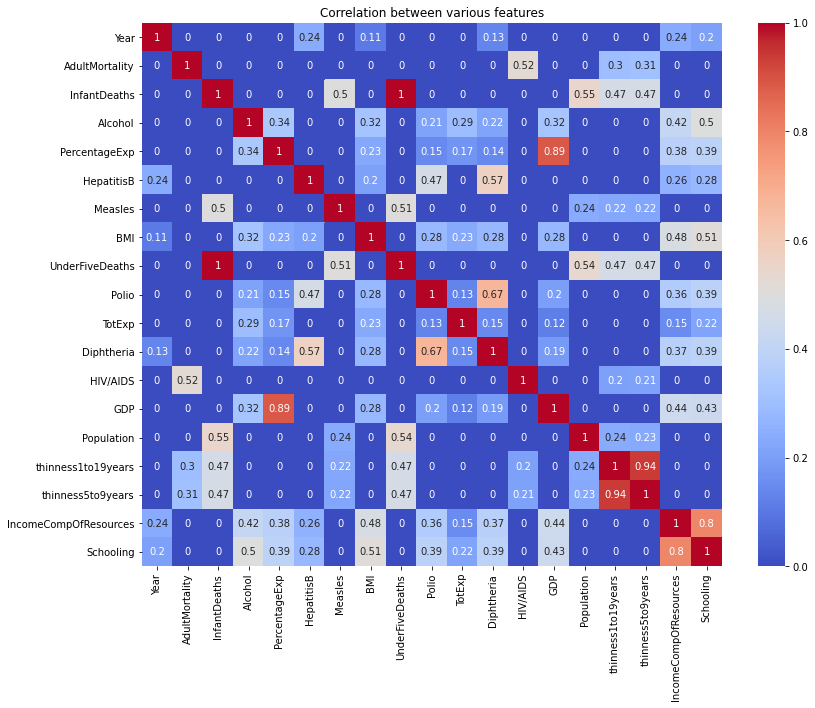

In [0]:
# The idea is to drop the columns that have high correlation.
# The below set of codes explain the following:
# Line 1 -> Correlation matrix is got using the DataFrame.corr() function and storing it in a variable(lifeDataInput_corr)
# Line 2 -> As we are only looking for high correlation, the factors that have correlation less than 0.1 is equalled to 0
# Line 3 -> Gives the size of the graph(width, height)
# Line 4 -> using sns.heatmap(data) function to visualize the heatmap
# Line 5,6 -> Giving a title to the heatmap and showing the graph

lifeDataInput_corr = lifeDataInput.corr()
lifeDataInput_corr[np.abs(lifeDataInput_corr < 0.1)] = 0
plt.figure(figsize=(13,10))
sns.heatmap(lifeDataInput_corr, annot = True, cmap = 'coolwarm')
plt.title("Correlation between various features")
plt.show()


**Insight:** The highly correlated attributes are "infantDeaths" and "UnderFiveDeaths" with almost 100% correlation.

Also, there are other columns that shows promising correlation above 80%


In [0]:
# To visualize only the highly correlated attributes using heatmaps
# To find the top correlated features we are sorting the correlation values with high to low

corr_matrix = lifeDataInput.corr().abs() 
corrsort = lifeDataInput.corr().unstack().sort_values(ascending = False).drop_duplicates() 
corrsort_df = pd.DataFrame(data=corrsort)
corrsort_df.head(5)


0
Schooling         Schooling              1.000000
UnderFiveDeaths   InfantDeaths           0.996629
thinness5to9years thinness1to19years     0.939102
PercentageExp     GDP                    0.889072
Schooling         IncomeCompOfResources  0.796207

In [0]:
# Creating a dataframe with only the above specified columns and storing it in lifeDataHighCorr

lifeDataHighCorr = lifeDataInput[['Schooling', 'UnderFiveDeaths', 'InfantDeaths', 'GDP', 'PercentageExp', 'thinness5to9years', 'thinness1to19years', 'IncomeCompOfResources' ]]
lifeDataHighCorr.head()


Schooling  UnderFiveDeaths  ...  thinness1to19years  IncomeCompOfResources
0       10.1               83  ...                17.2                  0.479
1       10.0               86  ...                17.5                  0.476
2        9.9               89  ...                17.7                  0.470
3        9.8               93  ...                17.9                  0.463
4        9.5               97  ...                18.2                  0.454

[5 rows x 8 columns]

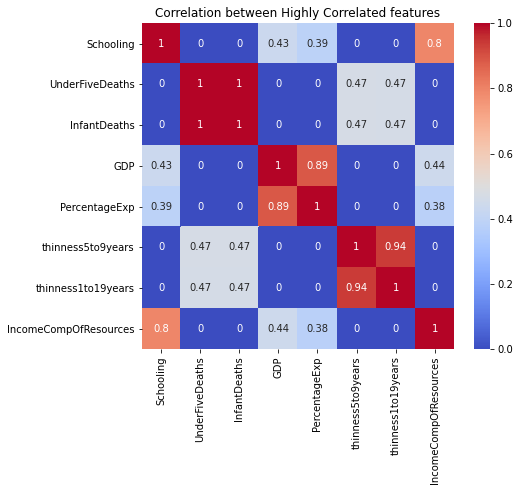

In [0]:
# Visualizing the correlation using heatmaps from seaborn library

highcorr = lifeDataHighCorr.corr()
highcorr[np.abs(highcorr < 0.1)] = 0
plt.figure(figsize=(7,6))
sns.heatmap(highcorr, annot = True, cmap = 'coolwarm')
plt.title("Correlation between Highly Correlated features")
plt.show()

**Insight:** The highly correlated attributes are "infantDeaths" and "UnderFiveDeaths" with almost 100% correlation and "percentageExp" and "GDP" with 96% correlation as already seen.

The other promising factors that show significant correlation are:

1. "thinness5to9years" and "thinness1to9years" with 94%

2. "PercentageExp" and "GDP" with 89%

3. "IncomeCompOfResources" and "Schooling" with 80%


**Action and Justification:** Among the highly correlated factors ("infantDeaths" and "UnderFiveDeaths", "percentageExp" and "GDP", "thinness5to9years" and "thinness1to9years") we decided to remove the factor that has many input values compared to the other factor. Therefore, "UnderFiveDeaths" , "IncomeCompOfResources" and "thinness5to9years" have been decided to be removed from the dataframe.

**Considering:** Whether to remove other correlated factors depends on how well the model learns and generalizes with or without the columns/attributed as per the CRISP-DM3 Methodology.



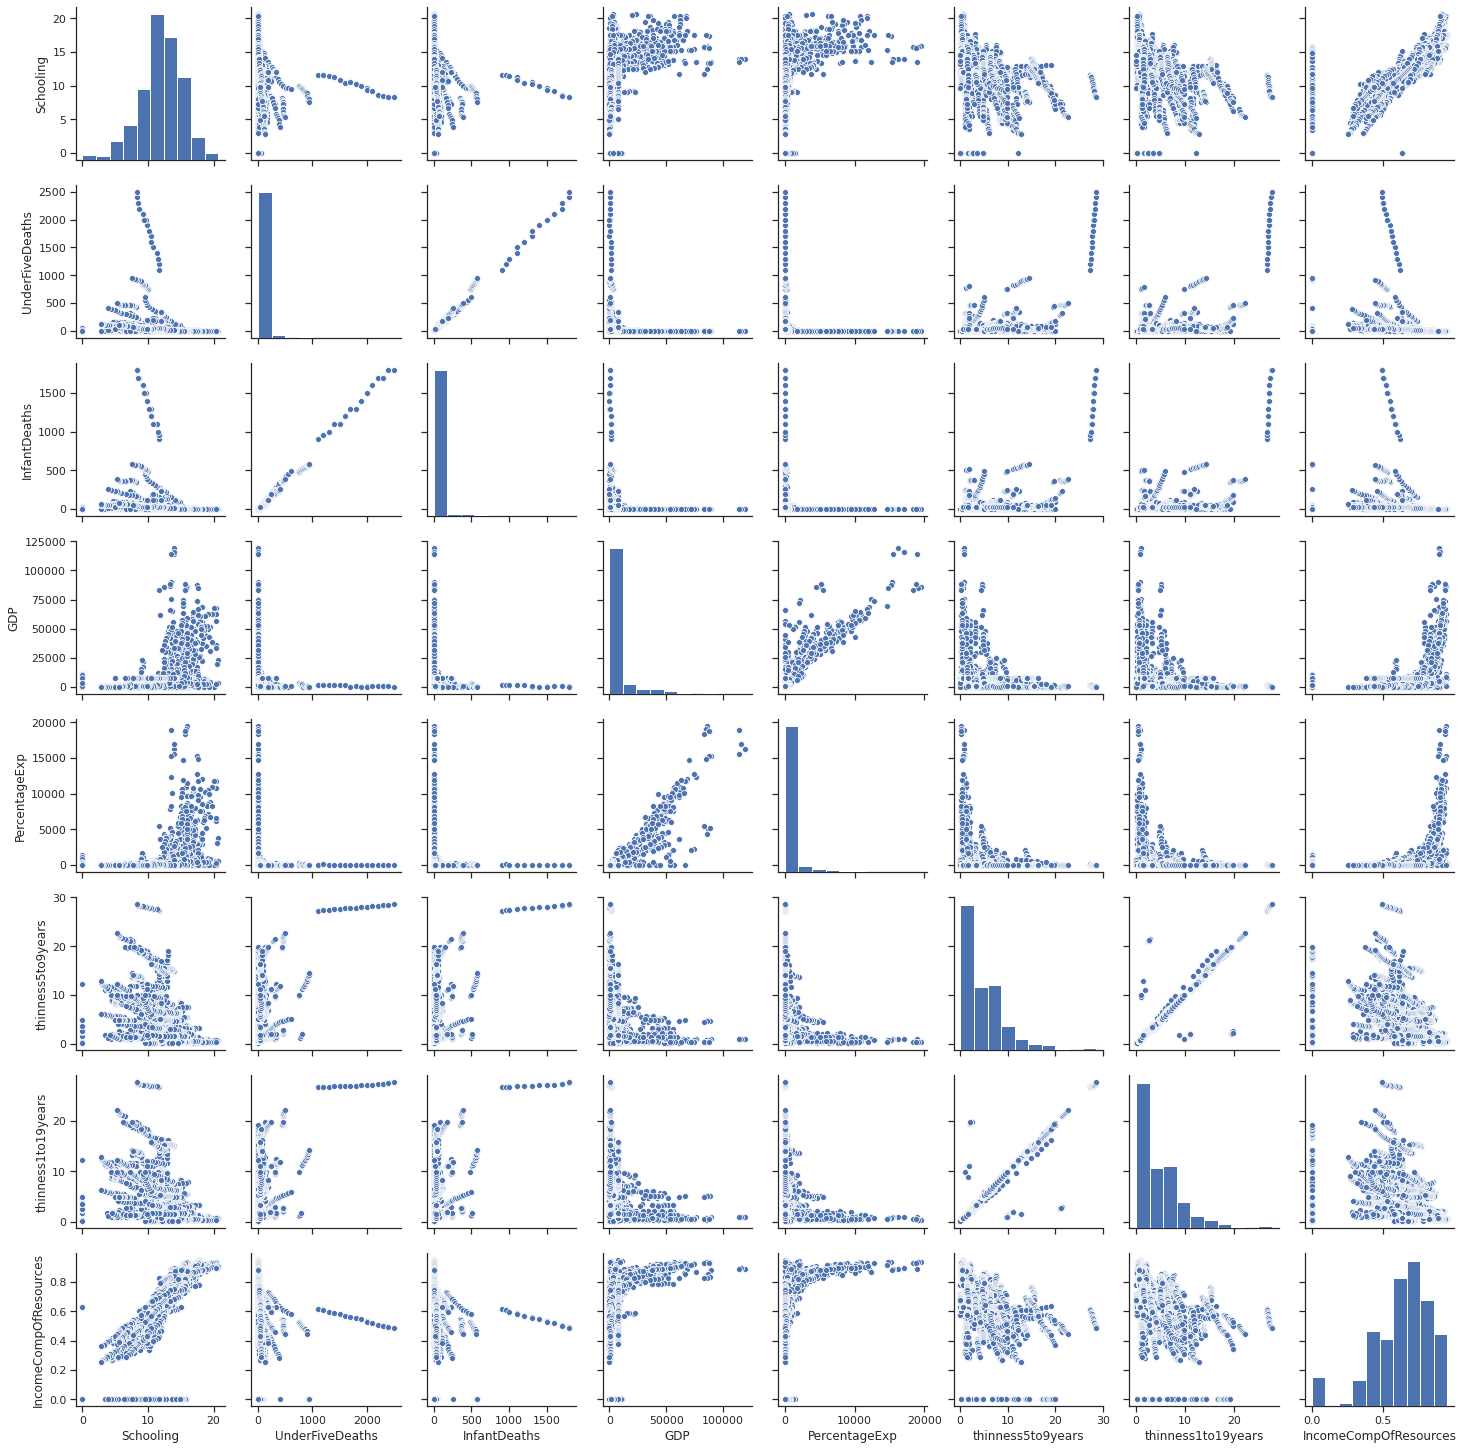

In [0]:
#Scatter matrix for visualizing the higly correlated input features
import seaborn as sns
sns.set(style="ticks")
lifeDataHighCorr = lifeData[['Schooling', 'UnderFiveDeaths', 'InfantDeaths', 'GDP', 'PercentageExp', 'thinness5to9years', 'thinness1to19years', 'IncomeCompOfResources']]
sns.pairplot(lifeDataHighCorr) 

In [0]:
# As per Step 3, "UnderFiveDeaths" and "IncomeCompOfResources" are dropped from the data frame

lifeData = lifeData.drop(['UnderFiveDeaths', 'IncomeCompOfResources', 'thinness5to9years'], axis=1)

## 4.4 Data Exploration 

In [0]:
# To explore the attributes having numeric and categorical values seperately, we are creating one dataframe for numeric and another for categorical
# The libraries used are numpy, seaborn, matplotlib which have been imported already for Dimensionality Reduction process.  
# ---------------------------------------------------------------------------------------------------------------------------------------------------------
# Attributes with only numeric values are stored in life_numeric array

life_numeric = lifeData.select_dtypes(include = [np.number])
life_numeric = life_numeric.columns.values
life_numeric

array(['Year', 'LifeExpectancy', 'AdultMortality', 'InfantDeaths',
       'Alcohol', 'PercentageExp', 'HepatitisB', 'Measles', 'BMI',
       'Polio', 'TotExp', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness1to19years', 'Schooling'], dtype=object)

In [0]:
# Attributes with only categorical values are stored in life_categoric array

life_categoric = lifeData.select_dtypes(exclude = [np.number])
life_categoric = life_categoric.columns.values
life_categoric


array(['Country', 'Status'], dtype=object)

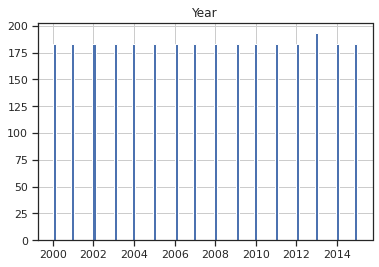

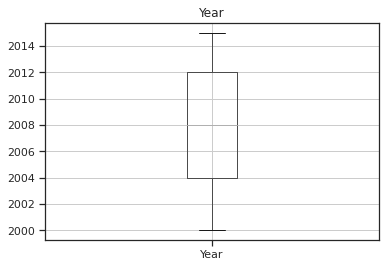

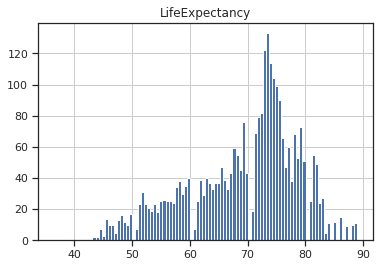

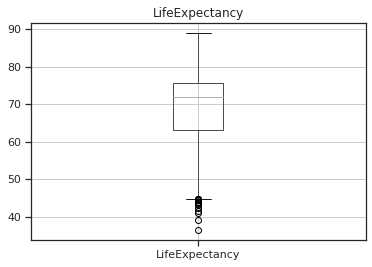

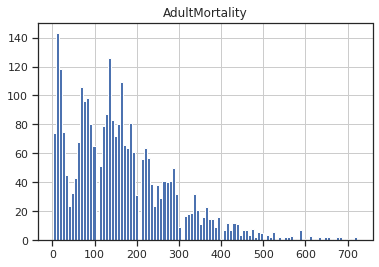

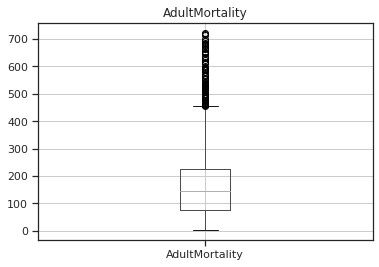

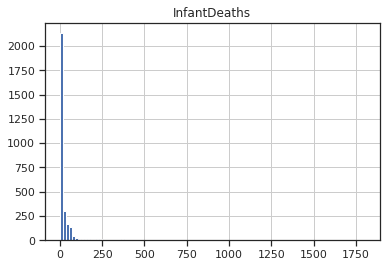

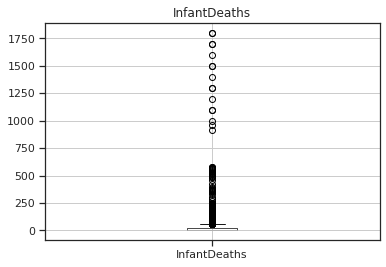

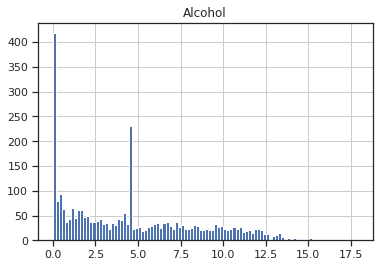

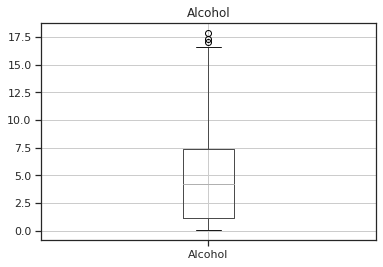

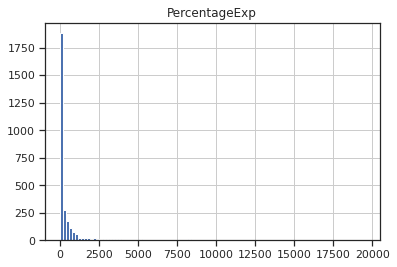

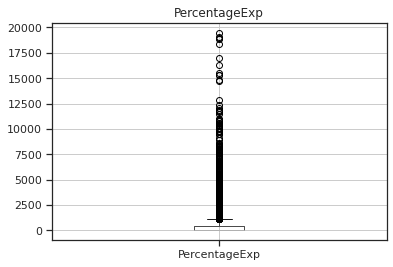

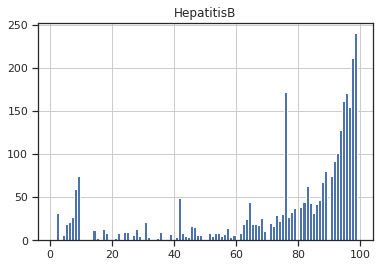

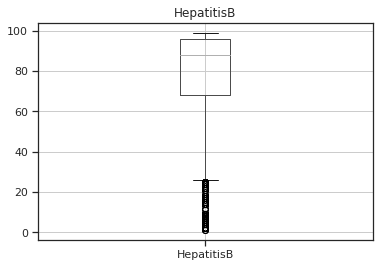

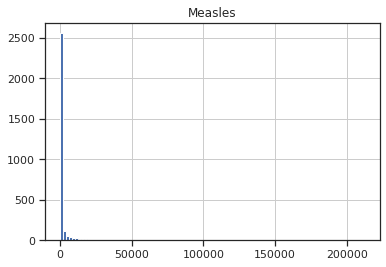

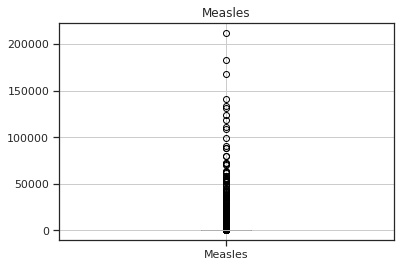

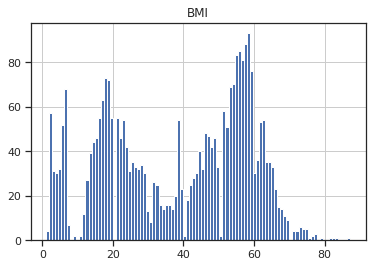

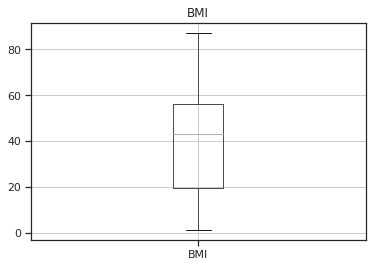

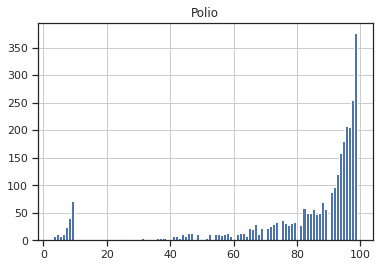

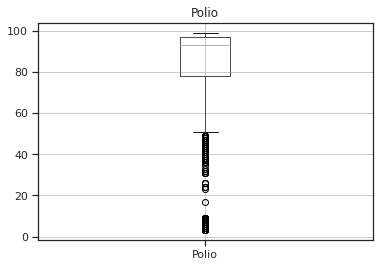

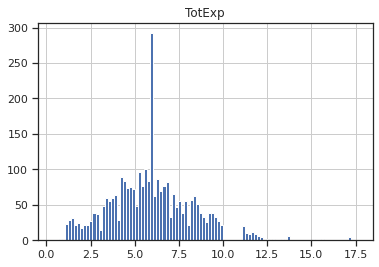

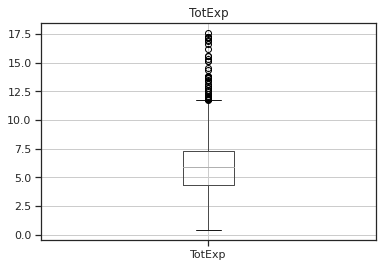

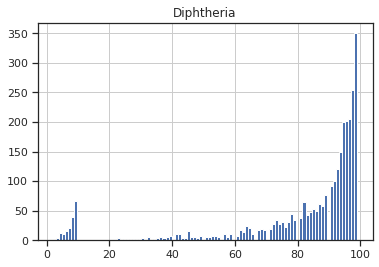

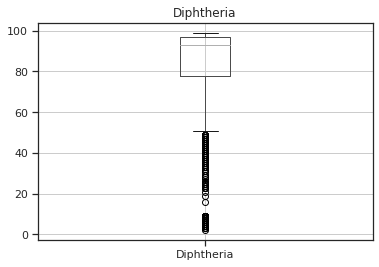

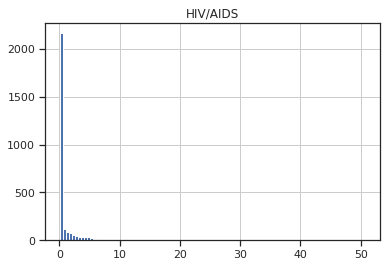

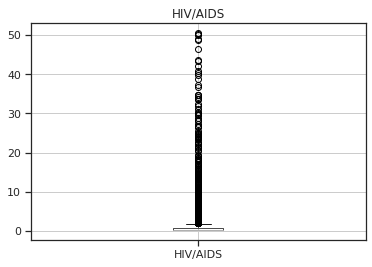

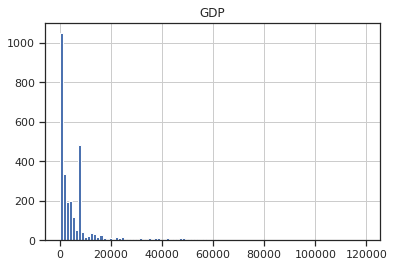

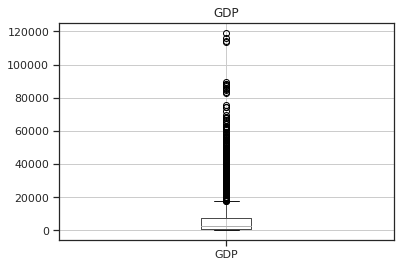

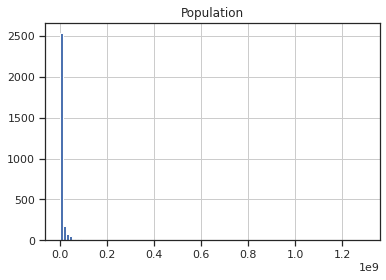

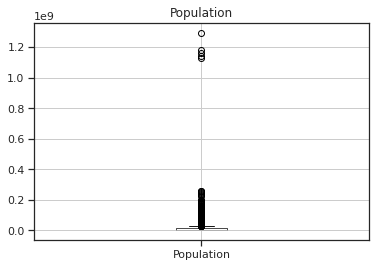

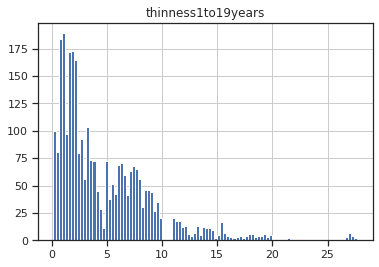

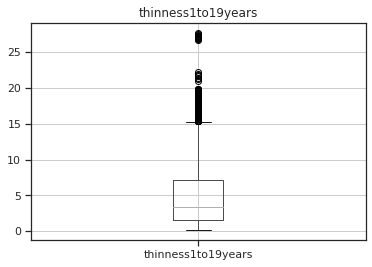

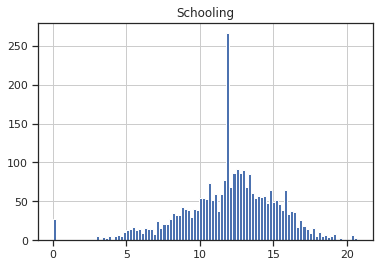

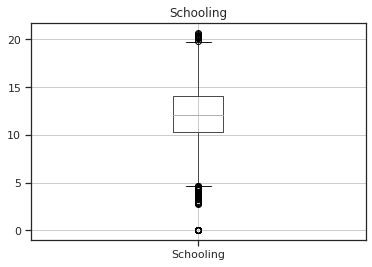

In [0]:
# Plotting Histogram and box plot graphs for Numeric Attributes

for i in life_numeric:
    lifeData[i].hist(bins=100)
    plt.title(i)
    plt.show()
    print()
    lifeData.boxplot(column = [i])
    plt.title(i)
    plt.show()
    print()

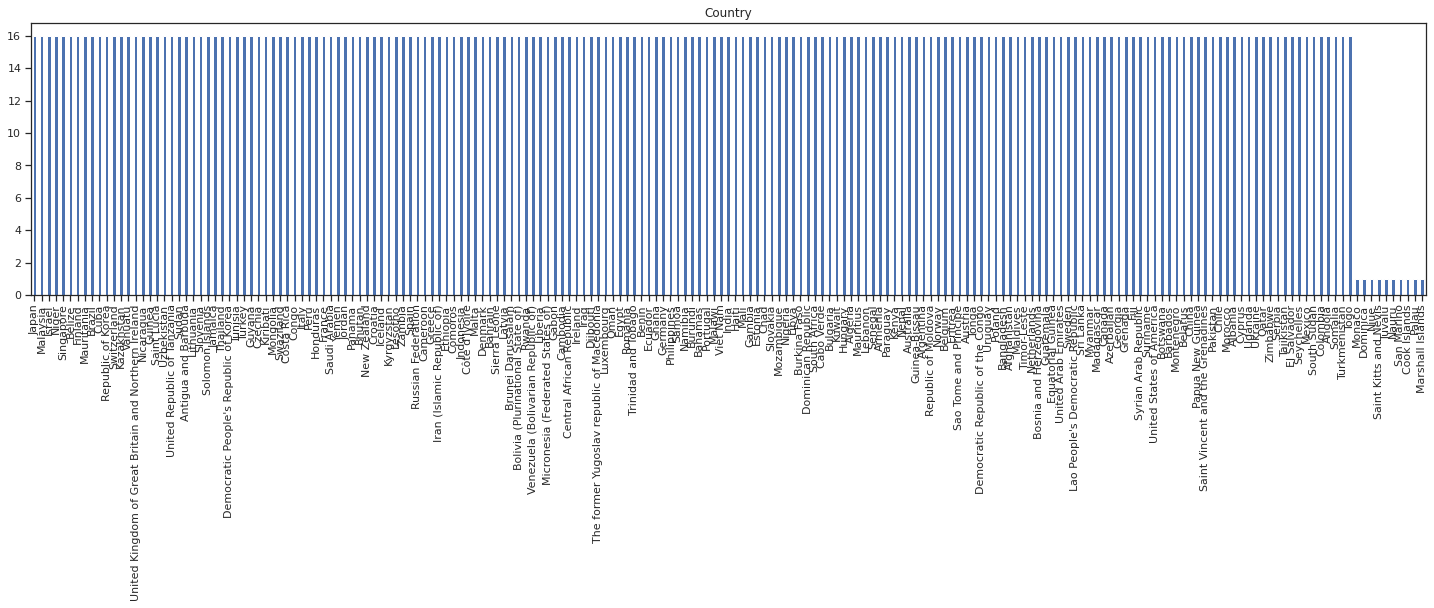

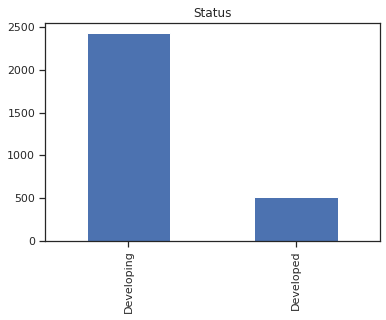

In [0]:
# Plotting Bar Charts for exploring Categorical Attributes

plt.figure(figsize=(25, 5))
for i in life_categoric:
    lifeData[i].value_counts().plot.bar()
    plt.title(i)
    plt.show()
    print()

## 4.5 Data Preparation

In [0]:
# To check for the data types and converting wrong data types to the right ones

lifeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             2938 non-null   object 
 1   Year                2938 non-null   int64  
 2   Status              2938 non-null   object 
 3   LifeExpectancy      2938 non-null   float64
 4   AdultMortality      2938 non-null   float64
 5   InfantDeaths        2938 non-null   int64  
 6   Alcohol             2938 non-null   float64
 7   PercentageExp       2938 non-null   float64
 8   HepatitisB          2938 non-null   float64
 9   Measles             2938 non-null   int64  
 10  BMI                 2938 non-null   float64
 11  Polio               2938 non-null   float64
 12  TotExp              2938 non-null   float64
 13  Diphtheria          2938 non-null   float64
 14  HIV/AIDS            2938 non-null   float64
 15  GDP                 2938 non-null   float64
 16  Popula

**Insight:** The below mentioned columns have dataype as "Object" which can be changed to "Category" which helps in reducing the size of the dataframe thereby making computations faster.

From "Object" to "Category": Country, Status


In [0]:
for i in life_categoric:
  lifeData[i] = lifeData[i].astype('category')

lifeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Country             2938 non-null   category
 1   Year                2938 non-null   int64   
 2   Status              2938 non-null   category
 3   LifeExpectancy      2938 non-null   float64 
 4   AdultMortality      2938 non-null   float64 
 5   InfantDeaths        2938 non-null   int64   
 6   Alcohol             2938 non-null   float64 
 7   PercentageExp       2938 non-null   float64 
 8   HepatitisB          2938 non-null   float64 
 9   Measles             2938 non-null   int64   
 10  BMI                 2938 non-null   float64 
 11  Polio               2938 non-null   float64 
 12  TotExp              2938 non-null   float64 
 13  Diphtheria          2938 non-null   float64 
 14  HIV/AIDS            2938 non-null   float64 
 15  GDP                 2938 non-null   fl

In [0]:
# Export out the final Dataframe

lifeData.to_csv("lifeData.csv", index=False)

**Conclusion:** The Data Preperation and Data Understanding for "Life Expectancy" dataset is done and "lifeData.csv" can be used for further preprocessing and building ML models.

Please download the cleaned datasets (ibmData.csv, mushroomData.csv, cpData.csv, lifeData.csv) from this notebook to upload it in the classification, clustering and regression python notebooks.

## 4.6 Data Visualization

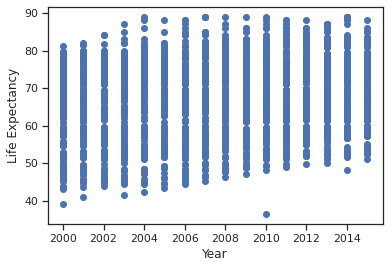

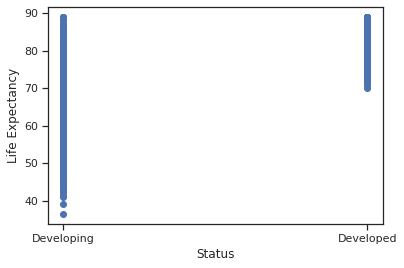

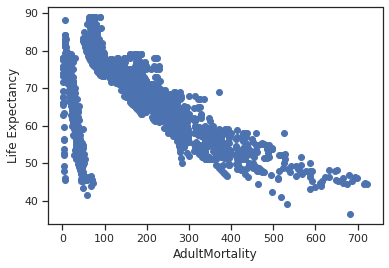

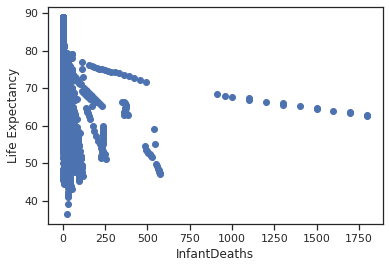

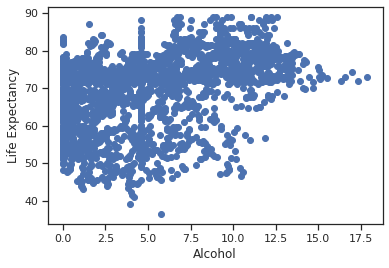

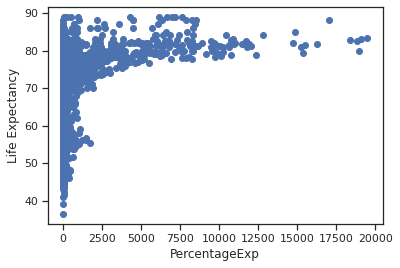

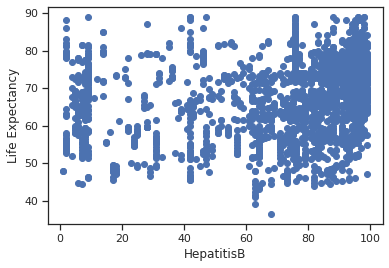

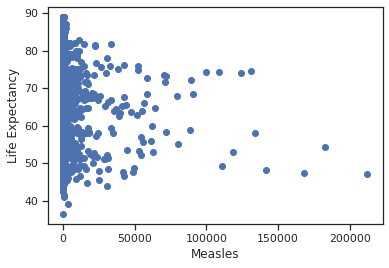

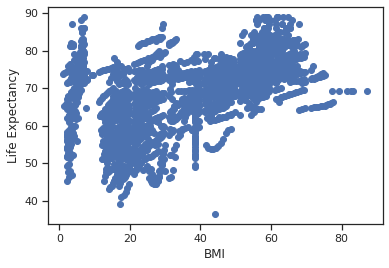

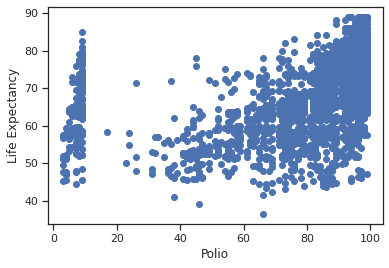

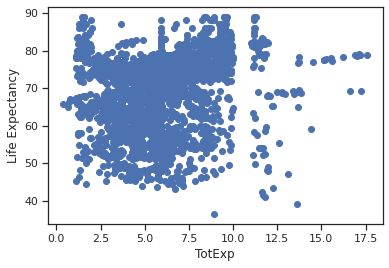

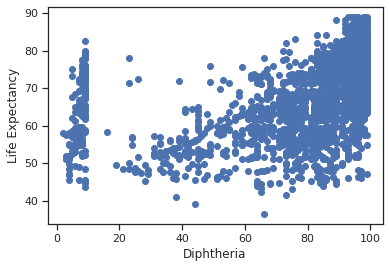

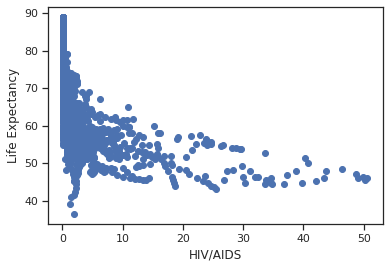

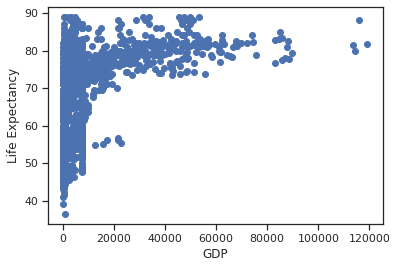

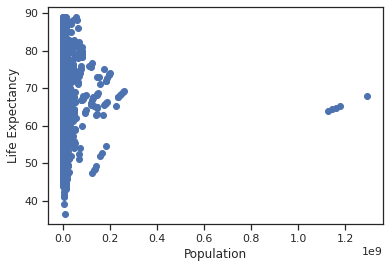

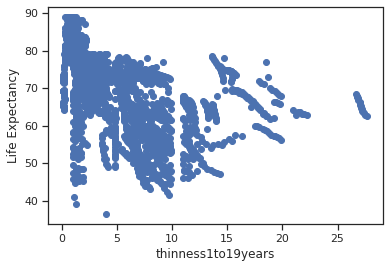

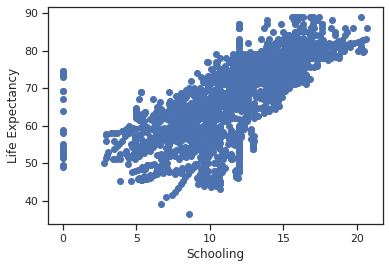

In [0]:
#Plotting scatter plot for each input variable against the output variable "LifeExpectancy"

x = lifeData.drop(['LifeExpectancy', 'Country'], axis=1)
y = lifeData['LifeExpectancy']

for i in x.columns:
  plt.scatter(x[i], y)
  plt.xlabel(i)
  plt.ylabel("Life Expectancy")
  plt.show()
  print()
 
